
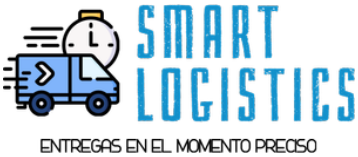

En Smart Logistic optimizamos los recursos operacionales y logísticos de tu negocio, con la finalidad agilizar la toma de decisiones sobre envío y recepción de mercadería en los plazos comprometidos con el cliente final.




# Índice

## *   Temática del proyecto
## *   Equipo y roles de profesionales participantes
## *   Descripción del tema y motivación
## *   Análisis inicial de los datos
## *   Importación de librerias
## *   Inspección de Base de datos
## *   Unificación de Base de datos
## *   Limpieza de Base de datos unificada
## *   Análisis exploratorio de variables
## *   Modelamiento
## *   Conclusión



### Temática del proyecto

#### Descripción

Una empresa que lleva productos a domicilio de distintos supermercados del país, realiza
una promesa a sus clientes comprometiéndose con un día y hora de entrega de los
productos. Esta promesa la hace utilizando un modelo predictivo.
Requerimientos

1. Informar el error del actual modelo por día.

2. Crear un modelo que desafíe el modelo actual.

3. Crear una estrategia que permita cumplir con la promesa realizada al cliente.

### Equipo y roles de los integrantes

#### Rol:	 		Líder del equipo
*   Responsable: 		Marcelo Tapia
*   Backup: 		Bárbara Rodríguez


#### Rol:	 		Ingeniero de análisis de datos
*   Responsable: 		Bárbara Rodríguez 
*   Backup: 		Lissette Diaz


#### Rol:	 		Ingeniero de datos
*   Responsable: 		Javiera Pacheco 
*   Backup: 		Marcelo Tapia


#### Rol:	 		Ingeniero de control de calidad y validación de datos
*   Responsable: 		Javier Palma
*   Backup: 		Javiera Pacheco


#### Rol:	 		Ingeniero de modelamiento 
*   Responsable: 		Lissette Diaz
*   Backup: 		Javier Palma

### Descripción del tema y motivación.

En Smart Logistics optimizamos los recursos operacionales y logísticos para el comercio electrónico, en particular desarrollamos una solución logística que busca mejorar la promesa de entrega de compras en supermercados.

Ventajas de adoptar la solución:
*   Mejorar la experiencia del cliente
*   Añadir valor al producto
*   Disminuir la ocurrencia de incidentes



### Análisis de los datos

Para dar comienzo a nuestro análisis debemos clarificar la información con la que contamos, esta consta de 4 bases de datos que contienen los siguientes atributos:

#### Orden_compra

    ● id_orden: Identificador del pedido de compra.

    ● Latitud: Dirección de entrega.

    ● Longitud: Dirección de entrega.

    ● Día: Día de la semana en que se prometió la orden.
        
    ● Promesa: Hora de entrega prometida al cliente.

    ● Entrega: Hora en que se entregó el pedido al cliente.

    ● id_entrega: Si el pedido fue solicitado en “Menos de 90 minutos” o en una ventana
    horario en el futuro.

    ● id_recolector: Identificador de la persona que recolectó el pedido.

    ● id_transporte: Identificador de la persona que hizo transporte del pedido.

    ● id_local: Identificador del local en que se realizó la compra.

    ● Tiempo: Tiempo total que demoró completar la orden (desde la compra hasta la entrega).


#### Orden_productos

    ● id_orden: Identificador del pedido de compra.

    ● id_productos: Identificador del producto.

    ● cant_producto: Cantidad solicitada del producto por el cliente.

    ● cant_encontrada: Cantidad solicitada del producto por el cliente.

    ● Unidad: Formato en que se vendió el producto (Unidades o KG).

#### Recolector

    ● id_recolector: Identificador recolector.

    ● Clasificación_recolector: Clasificación de experiencia recolector.

    ● P_aciertos: Porcentaje histórico de productos que el recolector encontró.

    ● Velocidad: Velocidad histórica de recogida de productos.

    ● P_aceptacion: Porcentaje histórico de pedidos aceptado por el recolector.

    ● Score_Recolector: Evaluación del recolector.

#### Tienda

    ● id_Tienda: Identificador de la tienda.

    ● tienda: Identificador de la tienda a la cual pertenece la tienda.

    ● latitud_tienda: Latitud de la ubicación de la tienda.

    ● Longitud_tienda: Longitud de la ubicación de la tienda.

#Importación de librerías

In [567]:
#Importamos las librerías para manipulación y análisis de datos extraidos de un documento
import pandas as pd
import numpy as np
#Importamos librerías que nos permitirán graficar
import matplotlib.pyplot as plt
import seaborn as sns
#Importamos libreria de dedodificación 
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
from sklearn.impute import KNNImputer
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')
import psycopg2, sqlalchemy
import csv 
#Se importan estandarizadores de escalas
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
#Se importa funcion para dividir muestras de entrenamiento y validación
from sklearn.model_selection import train_test_split
#Se importan distintos modelos de Machine Learning asociados a Regresión
from sklearn.feature_selection import SelectKBest, chi2, f_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV
#implementamos el algoritmo gradient boosting
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import pickle

En virtud del trabajo colaborativo del equipo se realiza una Conexión con Drive esta metodología solo es funcional desde 
Google Colab. Para efectos donde la revisión sea via Jupyter Notebook u otra herramienta similar, 
estas líneas se deben ignorar.

Conexión con Drive

In [ ]:
#En virtud del trabajo colaborativo del equipo realizamos una Conexión con Drive esta metodología solo es funcional desde 
#Google Colab. Para efectos donde la revisión sea via Jupyter Notebook u otra herramienta similar, 
#estas líneas se deben ignorar.

from google.colab import drive
drive.mount('/content/drive')

#Nombre: ruta
#Marcelo : /content/drive/MyDrive/Proyecto Data Science
#Barbi: /content/drive/MyDrive/ADL/Proyecto ADL
#Lissette: /content/drive/MyDrive/Proyecto ADL
#Javiera: /content/drive/MyDrive/proyecto ADL
#Javier: /content/drive/MyDrive/Proyecto ADL

path = input('path:')

Mounted at /content/drive
path:/content/drive/MyDrive/Proyecto Data Science


Ruta abrir la carpeta en drive

# Inspección de cada BBDD

Se efectúa una primera inspección de los atributos de cada una de las Bases de Datos. En base a ello se determinan las relaciones y llaves primarias. El primer objetivo será determinar nuestro vector o vectores objetivos.

Una vez determinado este punto, se genera una base de datos unificada donde se realizará el trabajo de datos necesario para el modelamiento, para ello se utilizarán dos métodos:

*   Por medio de un motor Postgresql con las uniones correspondientes

*   Por medio de deste mismo codigo realizando las uniones correspondientes a trvés del método "merge"

### Orden de compra


In [ ]:
#Se importa la Base de Datos hacia un Dataframe
#El documento se encuentra separado por ";" 
df_orden_compra= pd.read_csv(path + '/1_Orden_compra.csv', sep=";")

In [ ]:
#Se inspecciona un registro cualquiera de la base de datos
df_orden_compra.sample(1)

,order_id,lat,lng,dow,promised_time,actual_time,on_demand,picker_id,driver_id,store_branch_id,total_minutes
5862,7143388789e8652b3378ea406a9dbd99,18.290.925.721.912.100,-10.029.346.600.955.600,3,20:00:00,19:13:35,False,193bd77fabe9c6adea23d5470e0ef947,193bd77fabe9c6adea23d5470e0ef947,15bf16e04b6f5e730f38a7c6a4b47f21,109.007.382


Se puede destacar que los atributos order_id, picker_id, driver_id y store_branch_id poseen un formato alfanumérico poco amigable. Se debe considerar su transformación.

El atributo latitud tampoco posee un formato de latitudes, ya que tiene varios "miles" por lo tanto es necesario transformar ese contenido y otorgarle un sentido útil.

In [ ]:
print('Cantidad de Filas y columnas:', df_orden_compra.shape)
print("")
print('Nombre columnas:', df_orden_compra.columns)

Cantidad de Filas y columnas: (7295, 11)

Nombre columnas: Index(['order_id', 'lat', 'lng', 'dow', 'promised_time', 'actual_time',
       'on_demand', 'picker_id', 'driver_id', 'store_branch_id',
       'total_minutes'],
      dtype='object')


Se tiene en total 7295 compras realizadas de las cuales disponemos datos asociados como el tiempo comprometido (promised_time), el tiempo de entrega (actual_time)  y el total de minutos que tardó la entrega (total_minutes). Además existen datos asociados al recolector y al conductor que prestaron el servicio.

In [ ]:
#Observamos el tipo de datos de los atributos
df_orden_compra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7295 entries, 0 to 7294
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   order_id         7295 non-null   object
 1   lat              7295 non-null   object
 2   lng              7295 non-null   object
 3   dow              7295 non-null   int64 
 4   promised_time    7295 non-null   object
 5   actual_time      7295 non-null   object
 6   on_demand        7295 non-null   bool  
 7   picker_id        7295 non-null   object
 8   driver_id        7295 non-null   object
 9   store_branch_id  7295 non-null   object
 10  total_minutes    6543 non-null   object
dtypes: bool(1), int64(1), object(9)
memory usage: 577.2+ KB


Se observa que en su mayoría se tratan de objetos, a pesar de que algunos de ellos son valores numéricos, tanto enteros como decimales como el caso de las latitudes y longitudes y el total de minutos.

In [ ]:
#verificamos la existencia de valores nulos
df_orden_compra.isnull().sum()

order_id             0
lat                  0
lng                  0
dow                  0
promised_time        0
actual_time          0
on_demand            0
picker_id            0
driver_id            0
store_branch_id      0
total_minutes      752
dtype: int64

Existen 752 valores nulos en la base de datos, esto es una cantidad considerable, ya que corresponde a un número que supera el 10% del total de observaciones, en este caso compras.

Se recomienda buscar la manera de no eliminar esos datos y realizar un tratamiento representativo con ellos.

In [ ]:
#Observamos el comportamiento de los atributos en cuanto a su cantidad de ocurrencia
for index in df_orden_compra.columns:
    print("Atributo:", index)
    print(df_orden_compra[index].value_counts())
    print(" ")

Atributo: order_id
6abd5e28d01b7c733fe37485294235dc    1
e7449e7a2c2cbe3e71eb4c313ca06650    1
a831d42a12d9e5581f0ae8dfd8eefc69    1
57e14a67d26f47ce05af2fe2e537d556    1
7f57e5a0e6fdd748e449e700c7ef5c19    1
                                   ..
93fa6384f84da0d72f96b10b8bae6820    1
b9a01a2c738217bd3271293294004d9e    1
62642a917e9e2af4f123dc5660705af9    1
568bdbca1d3cdafc75ab3f20da2155ba    1
7ffa2d60aea99143b28564d737ca4b2b    1
Name: order_id, Length: 7295, dtype: int64
 
Atributo: lat
1.822.114.109.606.680     1
18.288.950.840.081.400    1
1.828.600.153.585.250     1
18.287.205.574.133.400    1
1.825.164.229.085.920     1
                         ..
1.823.138.376.578.340     1
1.828.825.554.471.320     1
18.228.699.620.038.900    1
18.174.912.935.892.100    1
1.819.384.968.732.850     1
Name: lat, Length: 7295, dtype: int64
 
Atributo: lng
-10.031.391.366.664.600    1
-10.032.668.421.801.600    1
-10.034.586.915.602.500    1
-10.035.408.298.226.300    1
-10.040.652.366.941.600   

En base a las observaciones realizadas sobre el recurso "Orden de Compra" es posible visualizar que la información corresponde al registro de compras realizadas según día de semana, así como información respecto a quien realizó la recolección de los productos, quién llevó el producto al domicilio, día y hora en que se realizó la entrega así como el horario comprometido para entrega.

De las anteriores observaciones se determina que el atributo idóneo para ser una clave primaria (ya que siempre es único) corresponde a la orden de compra.

De esta data se desprende que si lo que queremos es identificar los factores que inciden en el cumplimiento de la promesa de entrega, tendremos que establecer un mejor significado de nuestro vector objetivo candidato principal, que es el atributo total_minutes que hace referencia a la cantidad total de minutos que han pasado desde la recepción de la orden por parte del recolector hasta que esta ha sido entregada.



### Orden Productos

Se inspecciona el segundo documento que se nos ha proporcionado para el análisis. Este hace referencia a los productos comprados, su ID de dorden asociada y sus cantidades.

In [ ]:
df_orden_productos = pd.read_csv(path + '/2_Orden_productos.csv', sep=";")
df_orden_productos.head()

,order_id,product_id,quantity,quantity_found,buy_unit
0,bdfc44fb525986b7bab8c589fc47e853,ab9757d9892b0e83ab3a1c1af0c84c52,0.75,0.155,KG
1,bdfc44fb525986b7bab8c589fc47e853,f1f042251bf634d44f338fbaf13b16e4,0.3,0.400,KG
2,bdfc44fb525986b7bab8c589fc47e853,0630d47440965509b0b3f80fd1b3578f,1,1.000,UN
3,bdfc44fb525986b7bab8c589fc47e853,9dd69b1f300666d5573e3a9934f2e03e,2,2.000,UN
4,bdfc44fb525986b7bab8c589fc47e853,3dfcdbe308bde67370649dd875f2507b,1,1.000,UN


Se puede destacar que los atributos order_id, picker_id, driver_id y store_branch_id poseen un formato alfanumérico poco amigable. Se debe considerar su transformación.

El atributo latitud tampoco posee un formato de latitudes, ya que tiene varios "miles" por lo tanto es necesario transformar ese contenido y otorgarle un sentido útil.

In [ ]:
#Se inspecciona un registro cualquiera de la base de datos
df_orden_productos.sample(1)

,order_id,product_id,quantity,quantity_found,buy_unit
72046,2ae830624d34747bb616a28b4d1233b1,5dfe564419f4c33668f255ead562f4d1,4.6,3.908,KG


In [ ]:
print('Cantidad de Filas y columnas:', df_orden_compra.shape)
print("")
print('Nombre column as:', df_orden_compra.columns)

Cantidad de Filas y columnas: (7295, 11)

Nombre column as: Index(['order_id', 'lat', 'lng', 'dow', 'promised_time', 'actual_time',
       'on_demand', 'picker_id', 'driver_id', 'store_branch_id',
       'total_minutes'],
      dtype='object')


Se observa que la cantidad de registros supera los 120.000 y la cantidad de atributos es 5


In [ ]:
#Observamos el tipo de datos de los atributos
df_orden_productos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120876 entries, 0 to 120875
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   order_id        120876 non-null  object 
 1   product_id      120876 non-null  object 
 2   quantity        120876 non-null  object 
 3   quantity_found  120876 non-null  float64
 4   buy_unit        120876 non-null  object 
dtypes: float64(1), object(4)
memory usage: 4.6+ MB


La mayoría de las columnas son de tipo objeto con excepción de las cantidades

In [ ]:
#verificamos la existencia de valores nulos
df_orden_productos.isnull().sum()

order_id          0
product_id        0
quantity          0
quantity_found    0
buy_unit          0
dtype: int64

No se encuentran valores nulos

Se procede a continuación a revisar el comportamiento de cada atributo en cuanto a su cantidad de ocurrencias.

In [ ]:
#Observamos el comportamiento de los atributos en cuanto a su cantidad de ocurrencia
for index in df_orden_productos.columns:
    print("Atributo:", index)
    print("")
    print(df_orden_productos[index].value_counts())
    print(" ")

Atributo: order_id

22854d4e3f47c4d35d7dab956031b146    118
fbc4b323369bbcaff344c34616912d0a    109
0d37a1eea001f01b40232ffd496ff663    103
67720285179e3924bf7793e7002f52d7    103
c9c19b5c8113cccb3598d9d5ab4dc625     98
                                   ... 
f19aa6cf334f5e590f59b991d3e9eb0f      1
585cdb18f0976e3b04c8db98ec53c1f0      1
70068ef9ba44c45170e72ecb1f0ad669      1
68c9dabc99e5765967f0fe2a28512677      1
354d07b428432bca7daad0b33b8359ed      1
Name: order_id, Length: 7278, dtype: int64
 
Atributo: product_id

52b2dde1ab3ba8d053667b7b7b24d8f7    700
e346a8aa268c7c212703ff3d1471c1c5    626
60123da4ebe7c69054285b55e7a1d539    527
8d01329eb2c6357b5b124c0dc1c825e5    486
92300aa791238b67ccb000e717e4d860    482
                                   ... 
53790fbfd86f1524c8b19966cfa58e14      1
15acc49ef13f3ab4ce93851d37619510      1
32cbb0cb26ed70a619ca351484891d25      1
279707b9a46666885cf18cf0f8194b17      1
8a79a4e018ae7617f88b7f897a0bb3e0      1
Name: product_id, Length: 24999, 

El atributo "Buy Unit" es categórico y hace referencia a cantidad o al peso del producto según corresponda.

Tanto para el ID de compra como el ID de producto se repiten varias veces para algunos identificadores. Esto demuestra que la base de datos en cuestión nos da a conocer las compras realizadas pero separadas por producto y sus respectivas cantidades, una por una.

Se procede a inspeccionar el tercer documento que se nos dispuso para el análisis


### Recolector

Este documento hace referencia a información relacionada con el personal encargado de recolectar los productos del pedido y hacerlos llegar al conductor.

In [ ]:
df_recolector = pd.read_csv(path + '/3_Recolector.csv', sep=";")
df_recolector.head()

,shopper_id,seniority,found_rate,picking_speed,accepted_rate,rating
0,087ab65ceca40dbef697f585dc159d5d,ADVANCED,0.8610,1.64,1.00,4.48
1,645973c41314d763b58dc2bceeeeffc9,INTERMEDIATE,0.8337,2.83,0.96,4.79
2,82810715fdda44962e7e422015ea1f32,ADVANCED,0.8681,1.27,0.88,4.84
3,416aa7dbd5a2f58d7bca96657e8faa1e,INTERMEDIATE,0.8784,2.11,1.00,NaN
4,27a3e845a4c3eb7ded4748f84140a843,ADVANCED,0.8466,1.50,1.00,4.84


Se observa que el dataframe contiene información asociada al encargado de buscar los productos en la tienda y lo identifica mediante el atributo shopper_id, que a su vez figura como picker_id en los documentos Orden de compra y orden de productos previamente analizadas.

In [ ]:
#Inspeccionamos un registro cualquiera de la base de datos
df_recolector.sample(1)

,shopper_id,seniority,found_rate,picking_speed,accepted_rate,rating
211,193bd77fabe9c6adea23d5470e0ef947,ADVANCED,0.8368,1.72,1.0,4.88


In [ ]:
print('Cantidad de Filas y columnas:', df_recolector.shape)
print("")
print('Nombre columnas:', df_recolector.columns)


Cantidad de Filas y columnas: (600, 6)

Nombre columnas: Index(['shopper_id', 'seniority', 'found_rate', 'picking_speed',
       'accepted_rate', 'rating'],
      dtype='object')


La cantidad de registros asociados al Recolector es de 600, el documento tiene información asociada a la eperiencia (Seniority), velocidad de recolección, Porcentaje histórico de productos que el recolector encontró, Porcentaje histórico de pedidos aceptado por el recolector y la Evaluación del recolector. 

In [ ]:
#Se observa el tipo de datos de los atributos
df_recolector.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   shopper_id     600 non-null    object 
 1   seniority      600 non-null    object 
 2   found_rate     564 non-null    float64
 3   picking_speed  600 non-null    float64
 4   accepted_rate  594 non-null    float64
 5   rating         566 non-null    float64
dtypes: float64(4), object(2)
memory usage: 28.2+ KB


Se observa que hay valores tipo Object y decimales.

In [ ]:
#Se verifica la existencia de valores nulos
df_recolector.isnull().sum()


shopper_id        0
seniority         0
found_rate       36
picking_speed     0
accepted_rate     6
rating           34
dtype: int64

Existen valores nulos para found_rate y rating

In [ ]:
#Se observa el comportamiento de los atributos en cuanto a su cantidad de ocurrencia
for index in df_recolector.columns:
    print("Atributo:", index)
    print("")
    print(df_recolector[index].value_counts())
    print(" ")


Atributo: shopper_id

087ab65ceca40dbef697f585dc159d5d    1
755c1ee6d23173214f870b472bd433c1    1
8e45f2e4e004e29cc15f1d06b4267055    1
b3c4a1079dad6c47b97244fab199c51f    1
9d1ef1fd8de0c0d613974d3cf54748ee    1
                                   ..
5843ad69be3bed76ca8a2c931e455d9f    1
4f113718e4c94140dff968f7dfd8456b    1
e3dc65dd330265af648643e4c397afef    1
1c6f5b0234f2673792188dc441196554    1
d64625c9d6523aa5596291ff3d929bea    1
Name: shopper_id, Length: 600, dtype: int64
 
Atributo: seniority

ADVANCED        268
INTERMEDIATE    204
REVIEW           99
BEGINNER         29
Name: seniority, dtype: int64
 
Atributo: found_rate

0.8571    6
0.8333    6
0.8584    4
0.8462    4
0.8528    3
         ..
0.7879    1
0.8516    1
0.8805    1
0.8368    1
0.8153    1
Name: found_rate, Length: 442, dtype: int64
 
Atributo: picking_speed

2.37    37
2.00    20
1.67    12
3.00    10
1.50    10
        ..
2.26     1
1.36     1
2.19     1
1.16     1
3.10     1
Name: picking_speed, Length: 203, d

De este recurso se puede señalar que corresponde a datos de desempeño del personal encargado de recolectar los productos en la Tienda. En específico hallamos datos sobre la experiencia del recolector, su tasa de éxito en encontrar un producto, velocidad histórica de recogida de producto, porcentaje histórico de pedidos aceptado por el recolector y un atributo que señala la evaluación del recolector.

Se detecta además que los atributos found_rate y rating poseen valores nulos en cantidades similares (34 y 36) por lo cual podrían estar relacionados.

### Tienda


In [ ]:
df_tienda = pd.read_csv(path + '/4_tienda.csv', sep=";")
df_tienda.head()

,store_branch_id,store,lat,lng
0,cf0895f1e3beb8164f0a86e6f940ae56,c0b93cf93cf854981b8d6bd849eec4b0,18.160.308.413.602.800,-10.026.067.265.111.100
1,3ddd4c29cab4178d89d549c6ba65c236,044d56734d20e04984d846dade6d39f3,1.827.282.968.914.450,-10.031.881.435.593.900
2,e9763f24fd46d0b9e52d423207a87c3c,452ae015bf846e1d2932b7ea15720d64,18.273.494.015.704.800,-10.031.958.539.978.200
3,49b7d60d6095a9f1129ce798102b62f4,6447951cd071f6f045fd4e6194920926,1.824.774.341.566.610,-10.040.355.771.938.600
4,8f21cfda17b340aeee062220d0bee8e5,452ae015bf846e1d2932b7ea15720d64,18.203.111.495.565.700,-10.029.771.361.550.100


Se cuenta con 4 columnas que hacen referencia a la ubicación y nombre de cada sucursal, y además cadena a la que pertenece.

In [ ]:
#Se inspecciona un registro cualquiera de la base de datos
df_tienda.sample(1)

,store_branch_id,store,lat,lng
71,a3bed30221372366bcd9b9779f395d0b,451eb58b96f0a36f31d2beebd1c9a7a8,18.302.722.747.720.100,-10.034.460.048.548.200


In [ ]:
print('Cantidad de Filas y columnas:', df_tienda.shape)
print("")
print('Nombre columnas:', df_tienda.columns)


Cantidad de Filas y columnas: (113, 4)

Nombre columnas: Index(['store_branch_id', 'store', 'lat', 'lng'], dtype='object')


Se cuenta en total con 113 sucursales en los registros otorgados

In [ ]:
#Se observa el tipo de datos de los atributos
df_tienda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   store_branch_id  113 non-null    object
 1   store            113 non-null    object
 2   lat              113 non-null    object
 3   lng              113 non-null    object
dtypes: object(4)
memory usage: 3.7+ KB


Todos los atributos corresponden a objetos, no obstante los atributos lat y lng cuentan con valores numéricos. 

In [ ]:
#Se verifica la existencia de valores nulos
df_tienda.isnull().sum()


store_branch_id    0
store              0
lat                0
lng                0
dtype: int64

No se aprecian valores nulos

In [ ]:
#Se observa el comportamiento de los atributos en cuanto a su cantidad de ocurrencia
for index in df_tienda.columns:
    print("Atributo:", index)
    print("")
    print(df_tienda[index].value_counts())
    print(" ")


Atributo: store_branch_id

cf0895f1e3beb8164f0a86e6f940ae56    1
15bf16e04b6f5e730f38a7c6a4b47f21    1
5a6dd51ef5ed276079b6a102d4ceb8f6    1
41ca3a65599fb02ab0d0cdd23da1e922    1
1fc727dd540d924d2370b4d6ec0149fd    1
                                   ..
00868095685ee799fb5c158e8d081fe1    1
f82a21e295c90ae7bf09e1870b66edb8    1
0cdeb3c8700028cdf750409d66e354da    1
41d9a054007bfce5cd838d2f9b2d7db3    1
82862bb4ff9734b6f8fee2dcde6be96f    1
Name: store_branch_id, Length: 113, dtype: int64
 
Atributo: store

452ae015bf846e1d2932b7ea15720d64    19
9d65282d498c0338377867996e761399    15
c0b93cf93cf854981b8d6bd849eec4b0    12
387d4a5b65cf4bf00ad805c4b00eed01    12
6dd84f26df649bead537d40ec49afd36    10
60e4c4e1c1a8bc79123738227b9d0b08     9
e27789d5e619b255663b2bfa68b5851f     7
0fae7b61265bc7ca4ce4d81440b62501     6
451eb58b96f0a36f31d2beebd1c9a7a8     6
044d56734d20e04984d846dade6d39f3     5
6447951cd071f6f045fd4e6194920926     4
a08814af6c2379a480e261b3598ddbd5     2
a3bed30221372366bcd

En base a la naturaleza de los datos se observa que será necesaria una recodificación de los atributos asociados al nombre de sucursal y cadena.

En este recurso se detecta información sobre la ubicación de la tienda (lat y lng), el identificador de sucursal (store_branch_id) y el identificador de la tienda (store)

No se encuentran valores nulos

Se observa la necesidad de recodificar las variables de Latitud y Longitud, ya que posee un formato que no corresponde a los convencionalmente utilizados para señalar ubicaciones, en este caso grados decimales. Además hay algunos datos de las ubicaciones que están mal anotados, por ejemplo: 1.8.160.... debiese ser 18.160... 




## Unificación de base de datos


Se genera una base de datos unificada donde se realizará el trabajo de datos necesario para el modelamiento, para ello se utilizarán dos métodos:
1.   SQL: Por medio de un motor Postgresql con las uniones correspondientes
2.   PYTHON: Por medio de deste mismo codigo realizando las uniones correspondientes a través del método "merge"

### 1. SQL

 Se procede a generar 3 relaciones en postgresql para posteriormente, mediante consultas utilizando "Join", generar un único Dataframe.



Observación: Se comenta el codigo de la utilizacion de base de datos ya que puede tener caidas al no estar corriendo de forma local.

In [ ]:
# # Se establece la conexión hacia la Base de datos que almacenará las relaciones

# connection = psycopg2.connect(dbname="la_promesa",
#                         port = "5432",
#                         user = "postgres",
#                         password = "1234"
#                         )
# cursor = connection.cursor()

In [ ]:
# cursor.execute("""
#     CREATE TABLE ORDEN_PRODUCTOS(
#         id_orden varchar,
#         id_producto varchar,
#         cantidad varchar,
#         cantidad_encontrada varchar,
#         unidad_comprada varchar
#     );
# """)
# cursor.execute("""
#     CREATE TABLE RECOLECTOR(
#         id_recolector varchar,
#         antiguedad varchar,
#         puntaje_aciertos varchar,
#         velocidad_recoleccion varchar,
#         puntaje_aceptacion varchar,
#         puntaje_recolector varchar
#     );
# """)
# cursor.execute("""
#     CREATE TABLE TIENDA(
#         id_tienda varchar,
#         tienda varchar,
#         latitud varchar,
#         longitud varchar
#     );
# """)
# cursor.execute("""
#     CREATE TABLE ORDEN_COMPRA(
#         id_orden varchar,
#         latitud varchar,
#         longitud varchar,
#         dia_semana varchar,
#         tiempo_prometido varchar,
#         tiempo_actual varchar,
#         bajo_demanda varchar,
#         id_recolector varchar,
#         id_conductor varchar,
#         id_tienda varchar,
#         total_minutos varchar
#     );
# """)
# connection.commit()

In [ ]:
# with open('./2_Orden_productos.csv', 'r') as file:
#     # Se realiza la ingesta
#     reader = csv.reader(file, delimiter=';')
#     # Se realiza la primera fila que corresponde al header
#     next(reader)
#     # para cada una de las filas remanentes
#     eses = '%s, '*4
#     for row in reader:
#         # Se ejecuta una orden en el cursor que inserte los datos.
#         cursor.execute(f"INSERT INTO ORDEN_PRODUCTOS VALUES ({eses} %s)", row)
        
# with open('./3_Recolector.csv', 'r') as file:
#     # Se realiza la ingesta
#     reader = csv.reader(file, delimiter=';')
#     # ignoramos la primera fila que corresponde al header
#     next(reader)
#     # para cada una de las filas remanentes
#     eses = '%s, '*5
#     for row in reader:
#         # Se ejecuta una orden en el cursor que inserte los datos.
#         cursor.execute(f"INSERT INTO RECOLECTOR VALUES ({eses} %s)", row)
        
# with open('./4_tienda.csv', 'r') as file:
#     # Se realiza  la ingesta
#     reader = csv.reader(file, delimiter=';')
#     # Se ignora la primera fila que corresponde al header
#     next(reader)
#     # para cada una de las filas remanentes
#     eses = '%s, '*3
#     for row in reader:
#         # Se ejecuta una orden en el cursor que inserte los datos.
#         cursor.execute(f"INSERT INTO TIENDA VALUES ({eses} %s)", row)

# with open('./1_Orden_compra.csv', 'r') as file:
#     # Se realiza la ingesta
#     reader = csv.reader(file, delimiter=';')
#     # Se ignora la primera fila que corresponde al header
#     next(reader)
#     # para cada una de las filas remanentes
#     eses = '%s, '*10
#     for row in reader:
#         # Se ejecuta una orden en el cursor que inserte los datos.
#         cursor.execute(f"INSERT INTO ORDEN_COMPRA VALUES ({eses} %s)", row)
        
        
        
# connection.commit()

In [ ]:
# # generamos la consulta en el cursor
# cursor.execute("""
#     SELECT * FROM ORDEN_COMPRA oc 
#     FULL JOIN RECOLECTOR rec 
#     ON oc.id_recolector = rec.id_recolector
#     FULL JOIN TIENDA ti
#     ON oc.id_tienda = ti.id_tienda
#     FULL JOIN ORDEN_PRODUCTOS op
#     ON oc.id_orden = op.id_orden;
# """)
# columnas = cursor.fetchall()
# # Posteriormente transformamos la consulta en una lista antes deingresarla como un pd.DataFrame
# df = pd.DataFrame(list(columnas), columns = ["id_orden", "latitud", "longitud", "dia_semana", 
#                                                 "tiempo_prometido", "tiempo_actual", "bajo_demanda", 
#                                                 "id_recolector", "id_conductor", "id_tienda", 
#                                                 "total_minutos", "id_recolector", "antiguedad", 
#                                                 "puntaje_aciertos", "velocidad_recoleccion", 
#                                                 "puntaje_aceptacion", "puntaje_recolector", "id_tienda", 
#                                                 "tienda", "latitud", "longitud", "id_orden", "id_producto", 
#                                                 "cantidad", "cantidad_encontrada", "unidad_comprada"])

El resultado de estás uniones de tablas fue guardado en el archivo "la_promesa.csv"

### 2. PYTHON

In [ ]:
# Se cambia el nombre de la columna para poder realizar la correcta union en el dataframe de recolector
df_recolector.rename(columns={'shopper_id':'picker_id'}, inplace=True)

In [ ]:
# se realiza copia de los id ya que al importar desde la base de datos se obtienen las fk y 
# para que todo funcione correctamente debemos realizar esta copia
df_recolector["picker_id_fk"] = df_recolector["picker_id"]
df_orden_productos["order_id_fk"] = df_orden_productos["order_id"]
df_tienda["store_branch_id_fk"] = df_tienda["store_branch_id"]

In [ ]:
# Se realiza la union de los 4 dataframes
df = pd.merge(df_orden_compra, df_orden_productos, on = "order_id")
df = pd.merge(df, df_recolector, on = "picker_id")
df = pd.merge(df, df_tienda, on = "store_branch_id")

In [ ]:
df.head()

,order_id,lat_x,lng_x,dow,promised_time,actual_time,on_demand,picker_id,driver_id,store_branch_id,...,seniority,found_rate,picking_speed,accepted_rate,rating,picker_id_fk,store,lat_y,lng_y,store_branch_id_fk
0,6abd5e28d01b7c733fe37485294235dc,1.822.114.109.606.680,-10.031.391.366.664.600,2,13:00:00,12:00:15,False,09bb5bfe76adbb474dddbdd111a51623,09bb5bfe76adbb474dddbdd111a51623,0dc6fb5924a8b917bc641666ed02663c,...,ADVANCED,0.8564,1.56,1.0,4.68,09bb5bfe76adbb474dddbdd111a51623,60e4c4e1c1a8bc79123738227b9d0b08,1.823.190.132.492.320,-1.003.035.533.737.440,0dc6fb5924a8b917bc641666ed02663c
1,6abd5e28d01b7c733fe37485294235dc,1.822.114.109.606.680,-10.031.391.366.664.600,2,13:00:00,12:00:15,False,09bb5bfe76adbb474dddbdd111a51623,09bb5bfe76adbb474dddbdd111a51623,0dc6fb5924a8b917bc641666ed02663c,...,ADVANCED,0.8564,1.56,1.0,4.68,09bb5bfe76adbb474dddbdd111a51623,60e4c4e1c1a8bc79123738227b9d0b08,1.823.190.132.492.320,-1.003.035.533.737.440,0dc6fb5924a8b917bc641666ed02663c
2,6abd5e28d01b7c733fe37485294235dc,1.822.114.109.606.680,-10.031.391.366.664.600,2,13:00:00,12:00:15,False,09bb5bfe76adbb474dddbdd111a51623,09bb5bfe76adbb474dddbdd111a51623,0dc6fb5924a8b917bc641666ed02663c,...,ADVANCED,0.8564,1.56,1.0,4.68,09bb5bfe76adbb474dddbdd111a51623,60e4c4e1c1a8bc79123738227b9d0b08,1.823.190.132.492.320,-1.003.035.533.737.440,0dc6fb5924a8b917bc641666ed02663c
3,6abd5e28d01b7c733fe37485294235dc,1.822.114.109.606.680,-10.031.391.366.664.600,2,13:00:00,12:00:15,False,09bb5bfe76adbb474dddbdd111a51623,09bb5bfe76adbb474dddbdd111a51623,0dc6fb5924a8b917bc641666ed02663c,...,ADVANCED,0.8564,1.56,1.0,4.68,09bb5bfe76adbb474dddbdd111a51623,60e4c4e1c1a8bc79123738227b9d0b08,1.823.190.132.492.320,-1.003.035.533.737.440,0dc6fb5924a8b917bc641666ed02663c
4,6abd5e28d01b7c733fe37485294235dc,1.822.114.109.606.680,-10.031.391.366.664.600,2,13:00:00,12:00:15,False,09bb5bfe76adbb474dddbdd111a51623,09bb5bfe76adbb474dddbdd111a51623,0dc6fb5924a8b917bc641666ed02663c,...,ADVANCED,0.8564,1.56,1.0,4.68,09bb5bfe76adbb474dddbdd111a51623,60e4c4e1c1a8bc79123738227b9d0b08,1.823.190.132.492.320,-1.003.035.533.737.440,0dc6fb5924a8b917bc641666ed02663c


Observamos que el documento tiene 26 atributos, algunos de ellos repetidos y con columnas cuyos nombres no nos ayudan a identificar de qué factor se trata.

In [ ]:
df.columns

Index(['order_id', 'lat_x', 'lng_x', 'dow', 'promised_time', 'actual_time',
       'on_demand', 'picker_id', 'driver_id', 'store_branch_id',
       'total_minutes', 'product_id', 'quantity', 'quantity_found', 'buy_unit',
       'order_id_fk', 'seniority', 'found_rate', 'picking_speed',
       'accepted_rate', 'rating', 'picker_id_fk', 'store', 'lat_y', 'lng_y',
       'store_branch_id_fk'],
      dtype='object')

La union mantiene los nombres de las columnas de origen el cual dará problemas en las posteriores ejecuciones del tratamiento de los datos ya que se trabajo en base a lo que nos entrego postgres por el cual se procede a hacer coincidir los nombres

In [ ]:
df.rename(columns={'order_id':'id_orden', 
                   'lat_x':'latitud', 
                   'lng_x':'longitud', 
                   'dow':'dia_semana', 
                   'promised_time':'tiempo_prometido',
                   'actual_time':'tiempo_actual',
                   'on_demand':'bajo_demanda',
                   'picker_id':'id_recolector',
                   'driver_id':'id_conductor',
                   'store_branch_id':'id_tienda',
                   'total_minutes':'total_minutos',
                   'product_id':'id_producto',
                   'quantity':'cantidad',
                   'quantity_found':'cantidad_encontrada',
                   'buy_unit':'unidad_comprada',
                   'order_id_fk':'id_orden.1',
                   'seniority':'antiguedad',
                   'found_rate':'puntaje_aciertos',
                   'picking_speed':'velocidad_recoleccion',
                   'accepted_rate':'puntaje_aceptacion',
                   'rating':'puntaje_recolector',
                   'picker_id_fk':'id_recolector.1',
                   'store':'tienda',
                   'lat_y':'latitud.1',
                   'lng_y':'longitud.1',
                   'store_branch_id_fk':'id_tienda.1'}, inplace=True)

In [ ]:
#Establecemos el atributo "bajo_demanda" como tipo objeto
df["bajo_demanda"] = df["bajo_demanda"].astype('object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120876 entries, 0 to 120875
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id_orden               120876 non-null  object 
 1   latitud                120876 non-null  object 
 2   longitud               120876 non-null  object 
 3   dia_semana             120876 non-null  int64  
 4   tiempo_prometido       120876 non-null  object 
 5   tiempo_actual          120876 non-null  object 
 6   bajo_demanda           120876 non-null  object 
 7   id_recolector          120876 non-null  object 
 8   id_conductor           120876 non-null  object 
 9   id_tienda              120876 non-null  object 
 10  total_minutos          108813 non-null  object 
 11  id_producto            120876 non-null  object 
 12  cantidad               120876 non-null  object 
 13  cantidad_encontrada    120876 non-null  float64
 14  unidad_comprada        120876 non-nu

Se exporta la nueva base de datos unificada para la posterior utilizacion

In [ ]:
df.to_csv('la_promesa.csv')

Observación: el resultado de esta unión es identica a la obtenida por medio de SQL, por tanto el archivo lleva el mismo nombre "la_promesa.csv"

# Limpieza de base de datos unificada




Una vez creada la base de datos unificada se procederá a:

1.   Eliminación de valores nulos
2.   Diversas limpiezas y trasnformaciones de variables
3.   Recodificaciones

## Base de datos y descripción

In [ ]:
df = pd.read_csv(path + '/la_promesa.csv').drop(columns='Unnamed: 0')

Se importa la base de datos unificada almacenada en el archivo exportado luego del merge

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120895 entries, 0 to 120894
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id_orden               120893 non-null  object 
 1   latitud                120893 non-null  object 
 2   longitud               120893 non-null  object 
 3   dia_semana             120893 non-null  float64
 4   tiempo_prometido       120893 non-null  object 
 5   tiempo_actual          120893 non-null  object 
 6   bajo_demanda           120893 non-null  object 
 7   id_recolector          120893 non-null  object 
 8   id_conductor           120893 non-null  object 
 9   id_tienda              120893 non-null  object 
 10  total_minutos          108828 non-null  object 
 11  id_recolector.1        120895 non-null  object 
 12  antiguedad             120895 non-null  object 
 13  puntaje_aciertos       120101 non-null  float64
 14  velocidad_recoleccion  120895 non-nu

Se dispone de 26 columnas, no obstante muchas de ellas están en formato objeto y tendremos que transformarlo en un formato numérico.

Además existen columnas repetidas, como el ID de recolector, id de tienda, id de la orden.



In [ ]:
df.sample()

,id_orden,latitud,longitud,dia_semana,tiempo_prometido,tiempo_actual,bajo_demanda,id_recolector,id_conductor,id_tienda,...,puntaje_recolector,id_tienda.1,tienda,latitud.1,longitud.1,id_orden.1,id_producto,cantidad,cantidad_encontrada,unidad_comprada
99666,1237e679bad809b9afa9639e914811fe,18.204.981.494.038.100,-10.033.564.282.460.100,4.0,12:00:00,11:03:06,False,2ed810de27bd41494a9ad542aa319b14,2ed810de27bd41494a9ad542aa319b14,a5f0c25eb4cb2ffb0d5448e60b8fb81c,...,4.84,a5f0c25eb4cb2ffb0d5448e60b8fb81c,452ae015bf846e1d2932b7ea15720d64,18.193.397.413.498.500,-10.034.058.689.493.400,1237e679bad809b9afa9639e914811fe,618b9e47fcf14e2069525b8666503be5,4,4.0,UN


In [ ]:
df.shape

(120895, 26)

Se observa que este dataframe resultante contiene 120.876 registros cada uno de ellos corresponde a la compra de un producto específico

In [ ]:
df.isnull().sum()       

id_orden                     2
latitud                      2
longitud                     2
dia_semana                   2
tiempo_prometido             2
tiempo_actual                2
bajo_demanda                 2
id_recolector                2
id_conductor                 2
id_tienda                    2
total_minutos            12067
id_recolector.1              0
antiguedad                   0
puntaje_aciertos           794
velocidad_recoleccion        0
puntaje_aceptacion          66
puntaje_recolector         763
id_tienda.1                  2
tienda                       2
latitud.1                    2
longitud.1                   2
id_orden.1                  19
id_producto                 19
cantidad                    19
cantidad_encontrada         19
unidad_comprada             19
dtype: int64

Se observa la presencia de 12063 registros nulos en total_minutos, 793 registros nulos en puntaje_aciertos, 762 registros 

In [ ]:
#Se procede a eliminar las columnas repetidas

df = df.drop(columns='id_recolector.1')
df = df.drop(columns= 'id_orden.1')
df = df.drop(columns= 'id_tienda.1')

In [ ]:
#Se renombran los atributos relacionados con la latitud y longitud de la tienda
df.rename(columns={'latitud.1':'latitud_tienda',
                        'longitud.1':'longitud_tienda'}, inplace=True)

### Transformación vector objetivo: "total_minutos"

Efectuaremos la transformación de la variable total minutes por un formato que nos entregue el tiempo solo en minutos

In [ ]:
df['total_minutos'].sample(5)

24048             NaN
35348      68.765.125
62716     238.757.425
59343      86.404.402
101145     95.910.308
Name: total_minutos, dtype: object

In [ ]:
n = 0
for x in df["total_minutos"]:
  if type(x) == type("str"):
    df["total_minutos"][n] = (x.split("."))[0]
  n += 1

In [ ]:
df['total_minutos'].sample(10)

41855     67
65935     85
208      565
48991    NaN
11871    147
30260     88
61457    122
19711    NaN
26510    NaN
43859    143
Name: total_minutos, dtype: object

Se observa que las cantidades se han simplificado para señalar los minutos totales de la ejecución del pedido

### Transformación atributo "cantidad"

In [ ]:
#Se inspecciona el atributo asociado a la cantidad de unidades de producto
df["cantidad"]

0         0.75
1          0.3
2            1
3            2
4            1
          ... 
120890     NaN
120891     NaN
120892     NaN
120893     NaN
120894     NaN
Name: cantidad, Length: 120895, dtype: object

In [ ]:
#Se efectúa la transformación de valores numéricos en cantidades más comprensibles
n = 0
for x in df["cantidad"]:
  if type(x) == type("str"):
    df["cantidad"][n] = x[0:4]
  n += 1

In [ ]:
df["cantidad"].sample(5)

17131    0.25
48140       1
26534       1
9372        3
60209       1
Name: cantidad, dtype: object

Se transforman las cantidades a números más simplificados

In [ ]:
df["cantidad"].describe()

count     120876
unique       312
top            1
freq       72716
Name: cantidad, dtype: object

Al observar la descripción se desprende qué valores son únicos, la cantidad de registros de esta columna y el valor que más se repite, en este caso el 1. 

### Transformación a numérico

Se procede a transformar las columnas numéricas a un formato que corresponda a  números ya que actualmente están en formato cadena (string)

In [ ]:
# total_minutos, puntaje_aciertos, puntaje_aceptacion, puntaje_recolector, cantidad, cantidad_encontrada 
df["total_minutos"] = pd.to_numeric(df["total_minutos"])
df["puntaje_aciertos"] = pd.to_numeric(df["puntaje_aciertos"])
df["puntaje_aceptacion"] = pd.to_numeric(df["puntaje_aceptacion"])
df["puntaje_recolector"] = pd.to_numeric(df["puntaje_recolector"])
df["cantidad"] = pd.to_numeric(df["cantidad"])
df["cantidad_encontrada"] = pd.to_numeric(df["cantidad_encontrada"])

### Valores nulos

Para completar o predecir los valores faltantes en un conjunto de datos se procede a utilizar el método knn imputer. Este método funciona con el enfoque básico del algoritmo KNN en lugar del enfoque ingenuo de completar todos los valores con la media o la mediana.  En este enfoque, especificamos una distancia de los valores perdidos que también se conoce como el parámetro K. El valor faltante se predecirá en referencia a la media de los K vecinos. Para nuestro caso se decide utilizar el valor de los 5 vecinos más cercanos y la base sobre la cual debe tratarse el peso de los valores vecinos será la distancia. 

In [ ]:
#Se establece la variable knn_imputer la cual será aplicada a cada atributo que posee datos faltantes
knn_imputer = KNNImputer(n_neighbors=5, weights="distance")

#Se asignan valores con N = 5 para los valores Nulos de cada una de las siguientes columnas
df[['total_minutos']] = knn_imputer.fit_transform(df[['total_minutos']])
df[['puntaje_aciertos']] = knn_imputer.fit_transform(df[['puntaje_aciertos']])
df[['puntaje_aceptacion']] = knn_imputer.fit_transform(df[['puntaje_aceptacion']])
df[['puntaje_recolector']] = knn_imputer.fit_transform(df[['puntaje_recolector']])
df[['cantidad']] = knn_imputer.fit_transform(df[['cantidad']])
df[['cantidad_encontrada']] = knn_imputer.fit_transform(df[['cantidad_encontrada']])


In [ ]:
#Se prcede a revisar la cantidad de atributos faltantes luego de la imputación mediante KNN
df.isnull().sum()   

id_orden                  2
latitud                   2
longitud                  2
dia_semana                2
tiempo_prometido          2
tiempo_actual             2
bajo_demanda              2
id_recolector             2
id_conductor              2
id_tienda                 2
total_minutos             0
antiguedad                0
puntaje_aciertos          0
velocidad_recoleccion     0
puntaje_aceptacion        0
puntaje_recolector        0
tienda                    2
latitud_tienda            2
longitud_tienda           2
id_producto              19
cantidad                  0
cantidad_encontrada       0
unidad_comprada          19
dtype: int64

Al inspeccionar los valores NaN de cada atributo se detecta 19 valores para unidad comprada e id_producto, además de 2 atributos perdidos para varios de los otros atributos. 

---



In [ ]:
#Se aplica dropna para eliminar valores nulos indicados

df = df.dropna()

In [ ]:
df.isnull().sum()

id_orden                 0
latitud                  0
longitud                 0
dia_semana               0
tiempo_prometido         0
tiempo_actual            0
bajo_demanda             0
id_recolector            0
id_conductor             0
id_tienda                0
total_minutos            0
antiguedad               0
puntaje_aciertos         0
velocidad_recoleccion    0
puntaje_aceptacion       0
puntaje_recolector       0
tienda                   0
latitud_tienda           0
longitud_tienda          0
id_producto              0
cantidad                 0
cantidad_encontrada      0
unidad_comprada          0
dtype: int64

Confirmamos que ya no existen valores nulos

### Recodificación de atributos

In [ ]:
# Se recodifican las columnas de la lista llamada labels_id para que estas posean valores numéricos que permitan un entrenamiento posterior

labels_id = ['id_orden','dia_semana', 'bajo_demanda','id_recolector', 'id_conductor', 'id_tienda', 'antiguedad', 'tienda', 'id_producto', 'unidad_comprada']

for i in labels_id:
    df[i + "_recod"] = LabelEncoder().fit_transform(df[i])

In [ ]:
df.head()

,id_orden,latitud,longitud,dia_semana,tiempo_prometido,tiempo_actual,bajo_demanda,id_recolector,id_conductor,id_tienda,...,id_orden_recod,dia_semana_recod,bajo_demanda_recod,id_recolector_recod,id_conductor_recod,id_tienda_recod,antiguedad_recod,tienda_recod,id_producto_recod,unidad_comprada_recod
0,bdfc44fb525986b7bab8c589fc47e853,18.278.377.617.214.800,-10.032.018.421.186.200,0.0,10:00:00,9:01:49,False,e18453b1001b638bac1ea9e03a67673b,e18453b1001b638bac1ea9e03a67673b,0dc6fb5924a8b917bc641666ed02663c,...,5407,0,0,528,527,6,2,7,16748,0
1,bdfc44fb525986b7bab8c589fc47e853,18.278.377.617.214.800,-10.032.018.421.186.200,0.0,10:00:00,9:01:49,False,e18453b1001b638bac1ea9e03a67673b,e18453b1001b638bac1ea9e03a67673b,0dc6fb5924a8b917bc641666ed02663c,...,5407,0,0,528,527,6,2,7,23699,0
2,bdfc44fb525986b7bab8c589fc47e853,18.278.377.617.214.800,-10.032.018.421.186.200,0.0,10:00:00,9:01:49,False,e18453b1001b638bac1ea9e03a67673b,e18453b1001b638bac1ea9e03a67673b,0dc6fb5924a8b917bc641666ed02663c,...,5407,0,0,528,527,6,2,7,595,1
3,bdfc44fb525986b7bab8c589fc47e853,18.278.377.617.214.800,-10.032.018.421.186.200,0.0,10:00:00,9:01:49,False,e18453b1001b638bac1ea9e03a67673b,e18453b1001b638bac1ea9e03a67673b,0dc6fb5924a8b917bc641666ed02663c,...,5407,0,0,528,527,6,2,7,15441,1
4,bdfc44fb525986b7bab8c589fc47e853,18.278.377.617.214.800,-10.032.018.421.186.200,0.0,10:00:00,9:01:49,False,e18453b1001b638bac1ea9e03a67673b,e18453b1001b638bac1ea9e03a67673b,0dc6fb5924a8b917bc641666ed02663c,...,5407,0,0,528,527,6,2,7,5965,1


Se recodifican los atributos de latitud y longitud, tanto de origen como destino para que cuenten con un formato de tipo decimal que sea traducible a una real latitud/longitud

In [ ]:
#Se eliminan los puntos
df['latitud'] = df['latitud'].str.replace('.', '')
df['longitud'] = df['longitud'].str.replace('.', '')
df['latitud_tienda'] = df['latitud_tienda'].str.replace('.', '')
df['longitud_tienda'] = df['longitud_tienda'].str.replace('.', '')

In [ ]:
#Se establece como formato String
df['latitud'] = df['latitud'].astype(str)
df['longitud'] = df['longitud'].astype(str)
df['latitud_tienda'] = df['latitud_tienda'].astype(str)
df['longitud_tienda'] = df['longitud_tienda'].astype(str)

In [ ]:
#Se itera en cada valor de la columna latitud para colocar la puntuación donde corresponde
latitud = []
for i in range(len(df['latitud'])):  
    a = df['latitud'][i][:2] + '.' + df['latitud'][i][2:]
    latitud.append(a)

In [ ]:
#Se almacena el resultado en la columna correspondiente
df['latitud'] = latitud

In [ ]:
#Se itera en cada valor de la columna longitud para colocar la puntuación donde corresponde
longitud = []
for i in range(len(df['longitud'])):  
    a = df['longitud'][i][:3] + '.' + df['longitud'][i][3:]
    longitud.append(a)

In [ ]:
#Se almacena el resultado en la columna correspondiente

df['longitud'] = longitud

In [ ]:
latitud1 = []
for i in range(len(df['latitud_tienda'])):  
    a = df['latitud_tienda'][i][:2] + '.' + df['latitud_tienda'][i][2:]
    latitud1.append(a)

In [ ]:
df['latitud_tienda']  = latitud1

In [ ]:
longitud1 = []
for i in range(len(df['longitud_tienda'])):  
    a = df['longitud_tienda'][i][:3] + '.' + df['longitud_tienda'][i][3:]
    longitud1.append(a)

In [ ]:
df['longitud_tienda'] = longitud1

In [ ]:
df.head()

,id_orden,latitud,longitud,dia_semana,tiempo_prometido,tiempo_actual,bajo_demanda,id_recolector,id_conductor,id_tienda,...,id_orden_recod,dia_semana_recod,bajo_demanda_recod,id_recolector_recod,id_conductor_recod,id_tienda_recod,antiguedad_recod,tienda_recod,id_producto_recod,unidad_comprada_recod
0,bdfc44fb525986b7bab8c589fc47e853,18.278377617214800,-10.032018421186200,0.0,10:00:00,9:01:49,False,e18453b1001b638bac1ea9e03a67673b,e18453b1001b638bac1ea9e03a67673b,0dc6fb5924a8b917bc641666ed02663c,...,5407,0,0,528,527,6,2,7,16748,0
1,bdfc44fb525986b7bab8c589fc47e853,18.278377617214800,-10.032018421186200,0.0,10:00:00,9:01:49,False,e18453b1001b638bac1ea9e03a67673b,e18453b1001b638bac1ea9e03a67673b,0dc6fb5924a8b917bc641666ed02663c,...,5407,0,0,528,527,6,2,7,23699,0
2,bdfc44fb525986b7bab8c589fc47e853,18.278377617214800,-10.032018421186200,0.0,10:00:00,9:01:49,False,e18453b1001b638bac1ea9e03a67673b,e18453b1001b638bac1ea9e03a67673b,0dc6fb5924a8b917bc641666ed02663c,...,5407,0,0,528,527,6,2,7,595,1
3,bdfc44fb525986b7bab8c589fc47e853,18.278377617214800,-10.032018421186200,0.0,10:00:00,9:01:49,False,e18453b1001b638bac1ea9e03a67673b,e18453b1001b638bac1ea9e03a67673b,0dc6fb5924a8b917bc641666ed02663c,...,5407,0,0,528,527,6,2,7,15441,1
4,bdfc44fb525986b7bab8c589fc47e853,18.278377617214800,-10.032018421186200,0.0,10:00:00,9:01:49,False,e18453b1001b638bac1ea9e03a67673b,e18453b1001b638bac1ea9e03a67673b,0dc6fb5924a8b917bc641666ed02663c,...,5407,0,0,528,527,6,2,7,5965,1


Todas las variables decodificadas se sitúan al final del dataframe para no perder los datos de origen



### Tiempo entre la promesa y la hora de entrega real 

Se procede a trabajar con los atributos asociados al tiempo prometido y tiempo de entrega real del pedido para obtener diferencias entre lo prometido y entregado y así obtener mayor claridad del incumplimiento de promesa.

In [ ]:
#Se calcula la diferencia entre el tiempo prometido y el tiempo actual
df['dif'] = (pd.to_datetime(df['tiempo_prometido']) - pd.to_datetime(df['tiempo_actual']))

#Se transforma a segundos mediante el método timedelta de Numpy y se almacena en un nuevo atributo
df['dif_s'] = df['dif']/ np.timedelta64(1, 's')

#Se pasa a formato timedelta los atributos tiempo actual y tiempo prometido
df['tiempo_prometido'] = pd.to_timedelta(df['tiempo_prometido'])
df['tiempo_actual'] = pd.to_timedelta(df['tiempo_actual'])
df.sample(5)

,id_orden,latitud,longitud,dia_semana,tiempo_prometido,tiempo_actual,bajo_demanda,id_recolector,id_conductor,id_tienda,...,bajo_demanda_recod,id_recolector_recod,id_conductor_recod,id_tienda_recod,antiguedad_recod,tienda_recod,id_producto_recod,unidad_comprada_recod,dif,dif_s
24989,a2565bb7bb0079c873509aa80c0ee7ee,18.244220996582200,-10.030443033665700,1.0,0 days 11:00:00,0 days 10:11:47,False,06a71e8ab0c6db5ce22a4689fd76a3f4,06a71e8ab0c6db5ce22a4689fd76a3f4,0dc6fb5924a8b917bc641666ed02663c,...,0,10,10,6,0,7,10523,1,0 days 00:48:13,2893.0
115899,6754b6621158434cdfc7f41414bca2f1,18.21975973337150,-10.034317259253800,4.0,0 days 11:00:00,0 days 10:27:20,False,09bb5bfe76adbb474dddbdd111a51623,09bb5bfe76adbb474dddbdd111a51623,afd0a7b8d546fcc697bb93a5934b65c3,...,0,14,14,86,0,6,17417,1,0 days 00:32:40,1960.0
16518,650fc98a28e130c95797df6cc81a4604,18.287401944808900,-10.032948472044200,2.0,0 days 19:00:00,0 days 17:33:11,False,8ff844d4acda6df3ba4a87ddc3eaf771,8ff844d4acda6df3ba4a87ddc3eaf771,86e6e48d0cb57f794b0c48162409fa74,...,0,316,316,64,3,7,13329,1,0 days 01:26:49,5209.0
57665,fad61c982aac7fd4661d9d4c5b17ef3a,18.270981312791400,-10.032086900007800,5.0,0 days 23:00:00,0 days 22:16:03,False,e67d14db7f81c2aaaa131774d7366fe2,e67d14db7f81c2aaaa131774d7366fe2,0dc6fb5924a8b917bc641666ed02663c,...,0,539,538,6,0,7,16156,1,0 days 00:43:57,2637.0
19907,a9eeec0ea55d2ad2314fc0cea6abdcd7,18.287144017380200,-10.03302319921970,1.0,0 days 11:39:00,0 days 11:31:44,True,82810715fdda44962e7e422015ea1f32,17b61fa5475eb9a6774dce92010b1f14,86e6e48d0cb57f794b0c48162409fa74,...,1,290,52,64,0,7,24779,1,0 days 00:07:16,436.0


In [ ]:
df[['tiempo_prometido', 'tiempo_actual', 'dif', 'dif_s']].describe()

,tiempo_prometido,tiempo_actual,dif,dif_s
count,120876,120876,120876,120876.000000
mean,0 days 15:45:14.292663556,0 days 15:16:38.394842648,0 days 00:28:35.897820907,1715.897821
std,0 days 04:12:30.236442596,0 days 04:10:18.344370563,0 days 01:52:53.467621907,6773.467622
min,0 days 00:00:00,0 days 00:03:17,-1 days +00:13:30,-85590.000000
25%,0 days 12:03:00,0 days 11:42:22,0 days 00:15:16,916.000000
50%,0 days 15:00:00,0 days 14:43:00,0 days 00:36:12,2172.000000
75%,0 days 19:25:00,0 days 19:03:11,0 days 00:56:32,3392.000000
max,0 days 23:54:00,0 days 23:46:30,0 days 23:45:43,85543.000000


Se observa que la hora promedio de entrega sucede a las 15:16 hrs. y la hora primedio comprometida sucede a las 15:45 hrs.



In [ ]:
df['dif_m'] = df['dif_s']/60

In [ ]:
df['dif_m'].describe()

count    120876.000000
mean         28.598297
std         112.891127
min       -1426.500000
25%          15.266667
50%          36.200000
75%          56.533333
max        1425.716667
Name: dif_m, dtype: float64

Text(0.5, 1.0, 'dif_m')

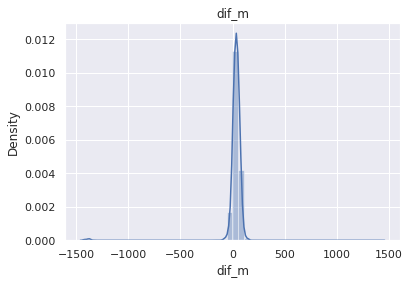

In [ ]:
sns.distplot(df['dif_m'])
plt.title('dif_m')


La mayoría de valores rondan muy cercanos al 0, sean estos negativos, es decir, valores pedidos que llegaron antes de lo informado o positivos, es decir, pedidos que llegaron más tarde de lo reportado

In [ ]:
#Se aplica la eliminación del outlier
rows_delete = df[(df['dif_m'] > 115)].index
df = df.drop(rows_delete)

In [ ]:
#Se aplica la eliminación del outlier
rows_delete = df[(df['dif_m'] < -115)].index
df = df.drop(rows_delete)

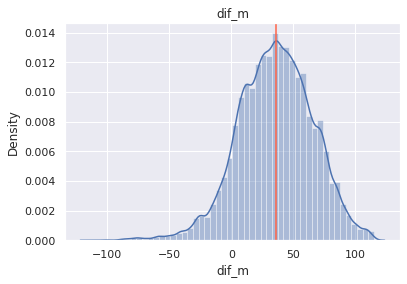

In [ ]:
sns.distplot(df['dif_m'])
plt.title('dif_m')
plt.axvline(df['dif_m'].mean(), color='tomato', label=df['dif_m'].mean())

Se puede observar que al quitar los valores que se escapan demasiado del comportamiento mayoritario existe un comportamiento normalizado, se puede identificar una campana Gaussiana donde los valores más comunes rondan los 40

## Agrupar la data por pedido y contabilizar las cantidad de productos por envío


In [ ]:
#df['cant_prod'] = df['id_producto'].groupby(df['id_orden']).transform('count')

In [ ]:
#df['cant_prod']

In [ ]:
df.sample()

,id_orden,latitud,longitud,dia_semana,tiempo_prometido,tiempo_actual,bajo_demanda,id_recolector,id_conductor,id_tienda,...,id_recolector_recod,id_conductor_recod,id_tienda_recod,antiguedad_recod,tienda_recod,id_producto_recod,unidad_comprada_recod,dif,dif_s,dif_m
79056,9aaf5dfb6ef1e8f88badf05988c2d2e0,18.24039854199180,-10.029325731852000,4.0,0 days 15:00:00,0 days 14:08:18,False,e9704582c322f9be46e7c28ab6497570,e9704582c322f9be46e7c28ab6497570,0309659a74b54b7933aa6c0571497d9b,...,546,545,3,2,6,9444,1,0 days 00:51:42,3102.0,51.7


## Análisis y tratamiento de Outliers

Se procede a crear gráficos de caja para observar la existencia de valores que se escapan de los valores comunes de la muestra (outliers)

In [ ]:
def crearGraficoCaja(df,divided):
  """ Creación de boxplot con finalidad de identificar outliers
      Atributos:
                df: Dataframe a graficar
                divided: Cantidad de divisiones a realizar
  """
  pivote = 0
  plt.figure(
      figsize = (32,28)
  )
  
  for columna in df.columns:
    plt.subplot(
        len(df.columns)/divided,
        len(df.columns)/divided,
        pivote +1
    )
    plt.boxplot(
        df[columna]
    )
    pivote = pivote + 1
    plt.title(columna, size=15)
    print("")
  plt.show()

Se establece un nuevo Dataframe que contenga solo las columnas ya procesadas

In [ ]:
df_copy = df.loc[:,['latitud', 'longitud', 'tiempo_prometido','tiempo_actual', 'total_minutos', 'puntaje_aciertos','velocidad_recoleccion', 'puntaje_aceptacion', 'puntaje_recolector', 'latitud_tienda', 'longitud_tienda','cantidad', 'cantidad_encontrada', 'id_orden_recod','dia_semana_recod', 'bajo_demanda_recod', 'id_recolector_recod','id_conductor_recod', 'id_tienda_recod', 'antiguedad_recod','tienda_recod', 'id_producto_recod', 'unidad_comprada_recod']]

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119313 entries, 0 to 120875
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype          
---  ------                 --------------   -----          
 0   latitud                119313 non-null  object         
 1   longitud               119313 non-null  object         
 2   tiempo_prometido       119313 non-null  timedelta64[ns]
 3   tiempo_actual          119313 non-null  timedelta64[ns]
 4   total_minutos          119313 non-null  float64        
 5   puntaje_aciertos       119313 non-null  float64        
 6   velocidad_recoleccion  119313 non-null  float64        
 7   puntaje_aceptacion     119313 non-null  float64        
 8   puntaje_recolector     119313 non-null  float64        
 9   latitud_tienda         119313 non-null  object         
 10  longitud_tienda        119313 non-null  object         
 11  cantidad               119313 non-null  float64        
 12  cantidad_encontrada    119313 

In [ ]:
#Se transforman columnas de latitudes, longitudes hacia tipo numérico
col_numeric = ['latitud', 'longitud', 'latitud_tienda', 'longitud_tienda']

for i in col_numeric:
  df_copy[i] = df_copy[i].astype(float, errors = 'raise')

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119313 entries, 0 to 120875
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype          
---  ------                 --------------   -----          
 0   latitud                119313 non-null  float64        
 1   longitud               119313 non-null  float64        
 2   tiempo_prometido       119313 non-null  timedelta64[ns]
 3   tiempo_actual          119313 non-null  timedelta64[ns]
 4   total_minutos          119313 non-null  float64        
 5   puntaje_aciertos       119313 non-null  float64        
 6   velocidad_recoleccion  119313 non-null  float64        
 7   puntaje_aceptacion     119313 non-null  float64        
 8   puntaje_recolector     119313 non-null  float64        
 9   latitud_tienda         119313 non-null  float64        
 10  longitud_tienda        119313 non-null  float64        
 11  cantidad               119313 non-null  float64        
 12  cantidad_encontrada    119313 

In [ ]:
df_copy = df_copy.loc[:,['latitud', 'longitud', 'total_minutos', 'puntaje_aciertos','velocidad_recoleccion', 'puntaje_aceptacion', 'puntaje_recolector', 'latitud_tienda', 'longitud_tienda','cantidad', 'cantidad_encontrada', 'id_orden_recod','dia_semana_recod', 'bajo_demanda_recod', 'id_recolector_recod','id_conductor_recod', 'id_tienda_recod', 'antiguedad_recod','tienda_recod', 'id_producto_recod', 'unidad_comprada_recod']]

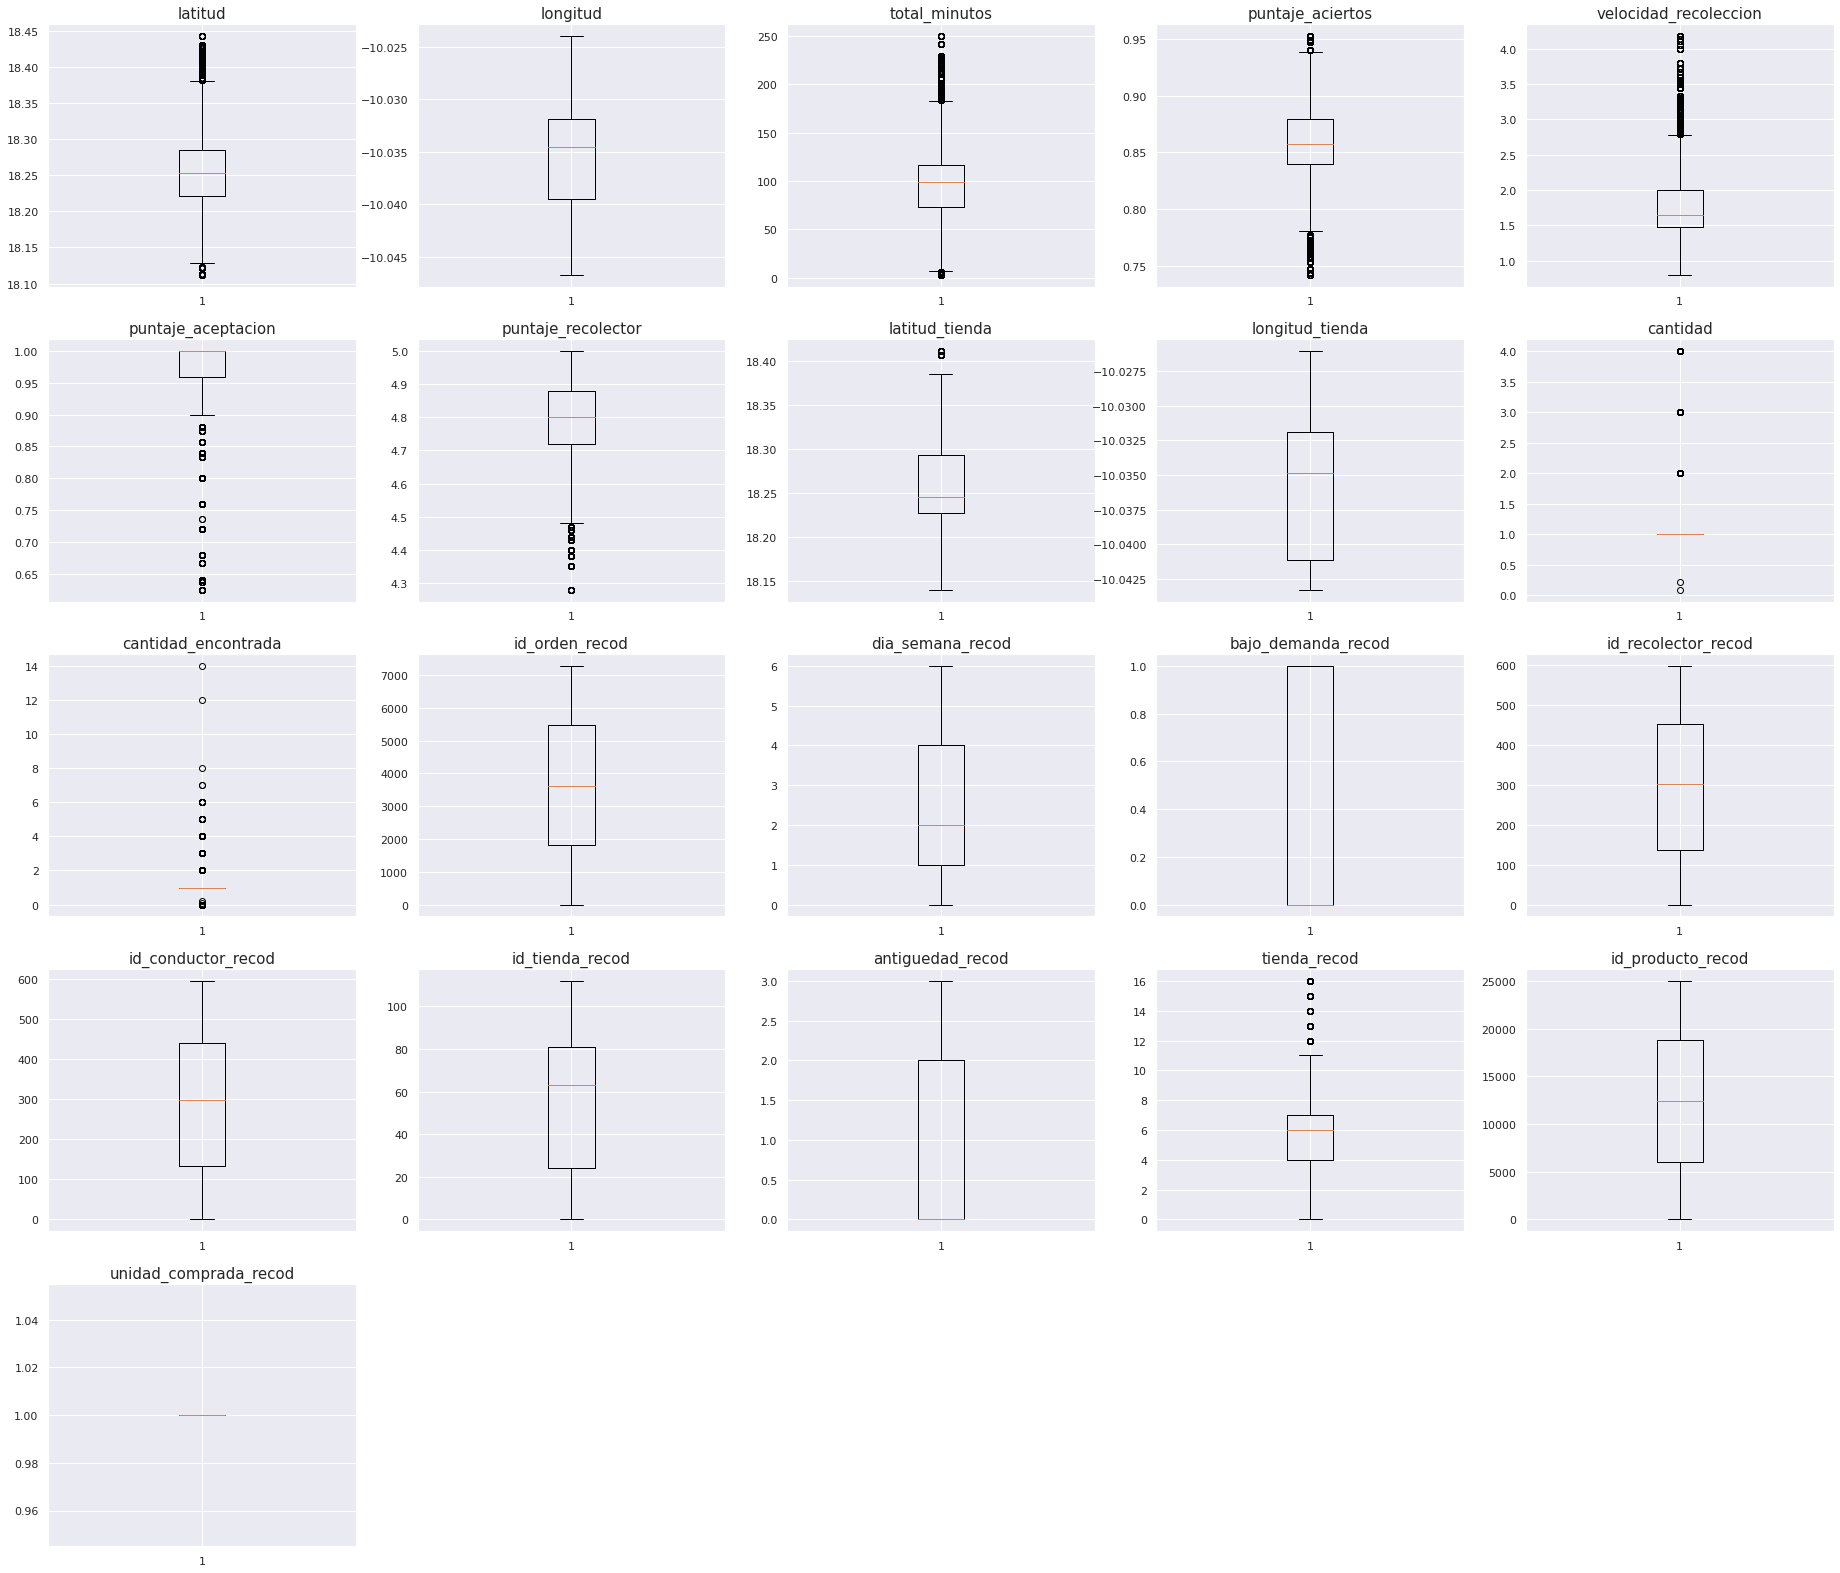

In [ ]:
crearGraficoCaja(df_copy,4)

En vista de que se considera que los Outliers pueden distorsionar el comportamiento normal de cada atributo, para las distintas columnas se extraerán los outliers según las siguientes reglas:
*   latitud arriba de 18.45
*   total_minutos arriba de 2.7 y bajo 250
*   puntaje_aciertos menor a 0.73
*   velocidad_recoleccion arriba de 4.3
*   puntaje_aceptacion menores 0.6
*   puntaje_recolector menor a 4.25
*   cantidad mayores a 4
*   cantidad_encontrada mayor a 60
*   cantidad_encontrada mayores a 18.40

In [ ]:
a = df_copy.shape[0]
a

119313

Se almacena en una variable "a" la cantidad total de registros

### latitud
Se establece la limpieza de estos outliers verificando el antes y después de aplicada la regla con un gráfico de distribución que permita observar el cambio en la distribución de la data asociada a cada atributo

latitud arriba de 18.45

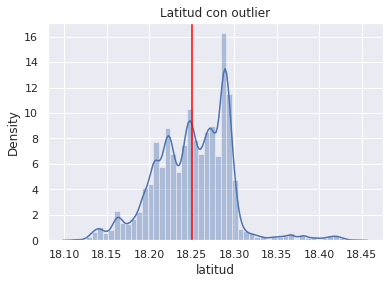

In [ ]:
sns.distplot(df_copy['latitud'])
plt.title('Latitud con outlier')
plt.axvline(df_copy['latitud'].mean(), color='red')

In [ ]:
#Se aplica la eliminación del outlier
rows_delete = df_copy[df_copy["latitud"] > 18.45].index
df_copy = df_copy.drop(rows_delete)

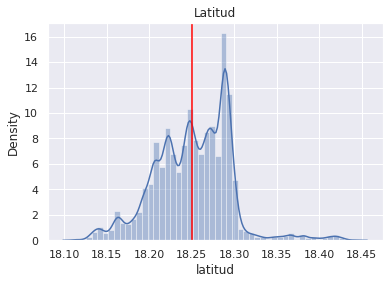

In [ ]:
sns.distplot(df_copy['latitud'])
plt.title('Latitud')
plt.axvline(df_copy['latitud'].mean(), color='red')

El comportamiento de este atributo no varía mucho al quitar el outlier de latitudes superiores a 18.45

In [ ]:
#Se almacena la nueva cantidad total de registros
b = df_copy.shape[0]
b

87228

In [ ]:
c = a - b
print('Se eliminaron', c, 'registros')

Se eliminaron 32085 registros


### total_minutes
total_minutos arriba de 2.7

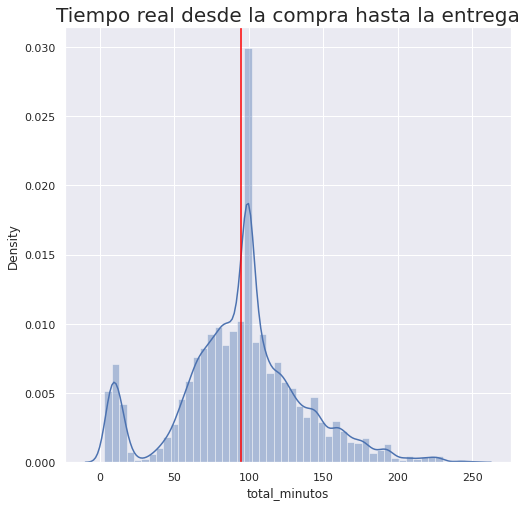

In [ ]:
plt.figure(figsize=(8,8))
sns.distplot(df_copy['total_minutos'])
plt.title('Tiempo real desde la compra hasta la entrega', size=20)
plt.axvline(df_copy['total_minutos'].mean(), color='red')

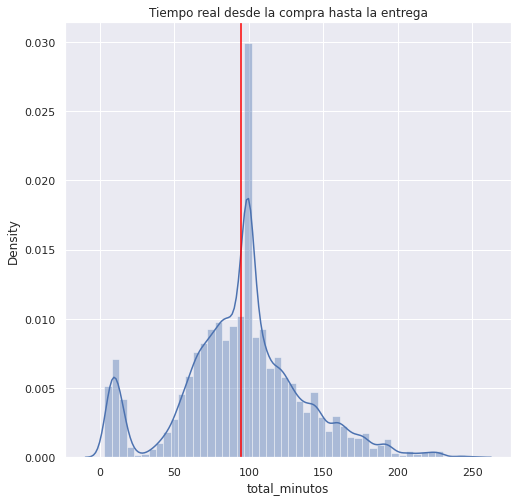

In [ ]:
df_copy = df_copy[(df_copy['total_minutos'] >= 2.7) & (df_copy['total_minutos'] <= 250)]
plt.figure(figsize=(8,8))
sns.distplot(df_copy['total_minutos'])
plt.title('Tiempo real desde la compra hasta la entrega')
plt.axvline(df_copy['total_minutos'].mean(), color='red')

Al acotar los minutos totales de la entrega entre 2.7 y 250 eliminamos outliers asociados a este parámetro, con lo cual al observar el gráfico se detecta una distribución más normalizada.

In [ ]:
d = df_copy.shape[0]
d

87228

In [ ]:
e = b - d
print('Se eliminaron', e, 'registros')

Se eliminaron 0 registros


### puntaje_aciertos
puntaje_aciertos menor a 0.73

En el puntaje de acierto 

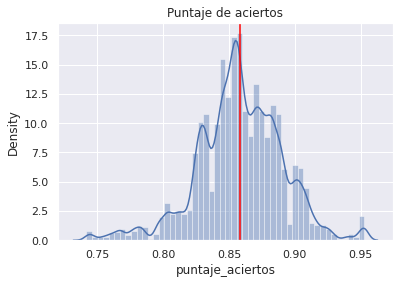

In [ ]:
sns.distplot(df_copy['puntaje_aciertos'])
plt.title('Puntaje de aciertos')
plt.axvline(df_copy['puntaje_aciertos'].mean(), color='red')

In [ ]:
rows_delete=df_copy[df_copy["puntaje_aciertos"] < 0.73].index
df_copy=df_copy.drop(rows_delete)

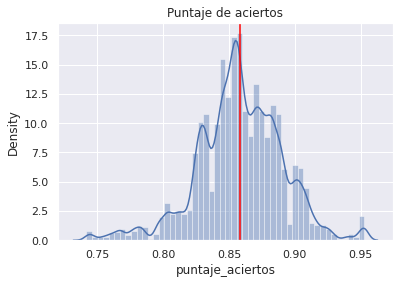

In [ ]:
sns.distplot(df_copy['puntaje_aciertos'])
plt.title('Puntaje de aciertos')
plt.axvline(df_copy['puntaje_aciertos'].mean(), color='red')

La eliminación de Outliers para el puntaje de aciertos no incide mayormente en la normalidad de la distribución de este atributo

In [ ]:
f = df_copy.shape[0]
f

87228

In [ ]:
g = d - f
print('Se eliminaron', g, 'registros')

Se eliminaron 0 registros


### velocidad_recoleccion
velocidad_recoleccion arriba de 4.3

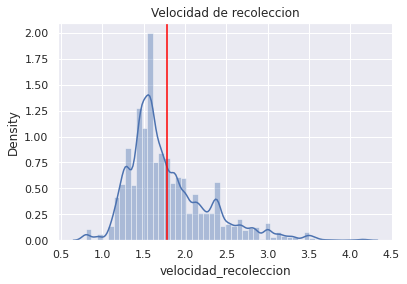

In [ ]:
sns.distplot(df_copy['velocidad_recoleccion'])
plt.title('Velocidad de recoleccion')
plt.axvline(df_copy['velocidad_recoleccion'].mean(), color='red')

In [ ]:
rows_delete=df_copy[df_copy["velocidad_recoleccion"] > 4.3].index
df_copy=df_copy.drop(rows_delete)

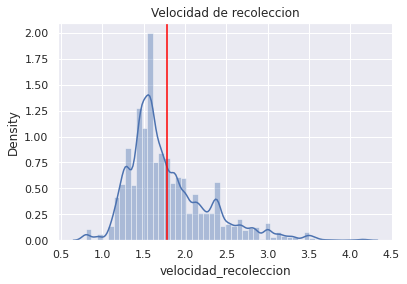

In [ ]:
sns.distplot(df_copy['velocidad_recoleccion'])
plt.title('Velocidad de recoleccion')
plt.axvline(df_copy['velocidad_recoleccion'].mean(), color='red')

In [ ]:
h = df_copy.shape[0]
h

87228

In [ ]:
i = f - h
print('Se eliminaron', i, 'registros')

Se eliminaron 0 registros


### puntaje_aceptacion
puntaje_aceptacion menores 0.6

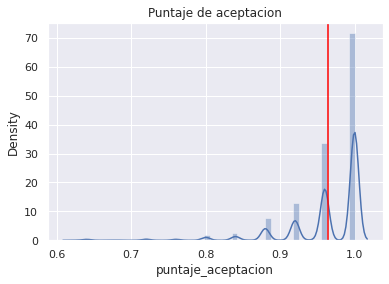

In [ ]:
sns.distplot(df_copy['puntaje_aceptacion'])
plt.title('Puntaje de aceptacion')
plt.axvline(df_copy['puntaje_aceptacion'].mean(), color='red')

In [ ]:
rows_delete=df_copy[df_copy["puntaje_aceptacion"] < 0.6].index
df_copy=df_copy.drop(rows_delete)

Text(0.5, 1.0, 'Puntaje de aceptacion')

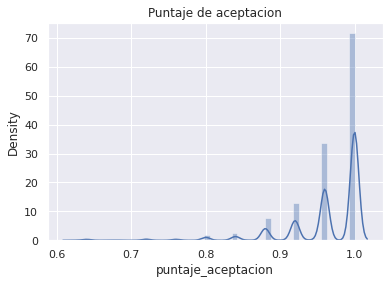

In [ ]:
sns.distplot(df_copy['puntaje_aceptacion'])
plt.title('Puntaje de aceptacion')
plt.axvline(df_copy['puntaje_aceptacion'].mean(), color='red')

In [ ]:
j = df_copy.shape[0]
j

87228

In [ ]:
k = h - j
print('Se eliminaron', k, 'registros')

Se eliminaron 0 registros


### puntaje_recolector
puntaje_recolector menor a 4.25

Text(0.5, 1.0, 'Puntaje de recolector')

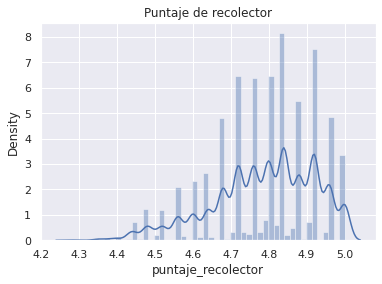

In [ ]:
sns.distplot(df_copy['puntaje_recolector'])
plt.title('Puntaje de recolector')

In [ ]:
rows_delete=df_copy[df_copy["puntaje_recolector"] < 4.25].index
df_copy=df_copy.drop(rows_delete)

Text(0.5, 1.0, 'Puntaje de recolector')

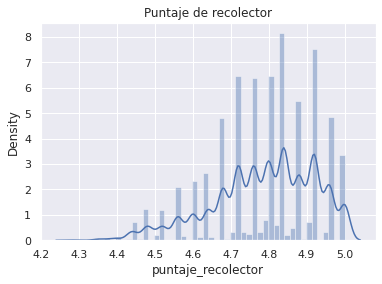

In [ ]:
sns.distplot(df_copy['puntaje_recolector'])
plt.title('Puntaje de recolector')

In [ ]:
l = df_copy.shape[0]
l

87228

In [ ]:
m = j - l
print('Se eliminaron', m, 'registros')

Se eliminaron 0 registros


### cantidad de productos
Se eliminan los productos cuyas cantidades sean mayores a 4 en vista 

Text(0.5, 1.0, 'Cantidad')

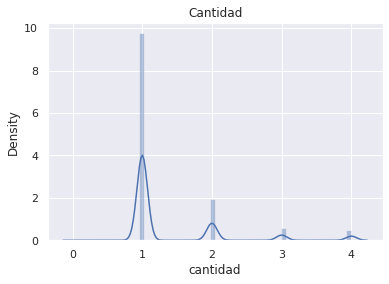

In [ ]:
sns.distplot(df_copy['cantidad'])
plt.title('Cantidad')

In [ ]:
rows_delete=df_copy[df_copy["cantidad"] > 4].index
df_copy=df_copy.drop(rows_delete)

Text(0.5, 1.0, 'Cantidad')

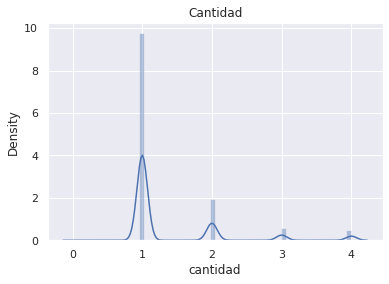

In [ ]:
sns.distplot(df_copy['cantidad'])
plt.title('Cantidad')

In [ ]:
n = df_copy.shape[0]
n

87228

In [ ]:
o = l - n
print('Se eliminaron', o, 'registros')

Se eliminaron 0 registros


### cantidad_encontrada
cantidad_encontrada mayores a 18.40

Text(0.5, 1.0, 'Cantidad encontrada')

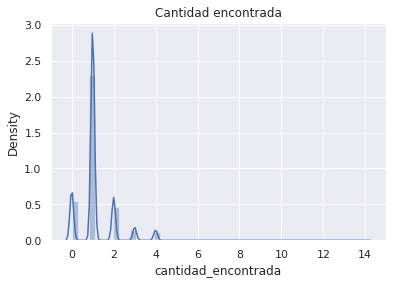

In [ ]:
sns.distplot(df_copy['cantidad_encontrada'])
plt.title('Cantidad encontrada')

In [ ]:
rows_delete=df_copy[df_copy["cantidad_encontrada"] > 60].index
df_copy=df_copy.drop(rows_delete)

Text(0.5, 1.0, 'Cantidad encontrada')

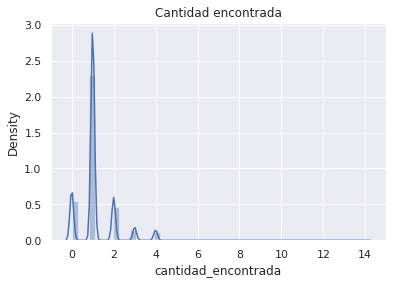

In [ ]:
sns.distplot(df_copy['cantidad_encontrada'])
plt.title('Cantidad encontrada')

In [ ]:
p = df_copy.shape[0]
p

87228

In [ ]:
q = n - p
print('Se eliminaron', q, 'registros')

Se eliminaron 0 registros


### latitud_tienda
latitud_tienda iguales a 0.0

Text(0.5, 1.0, 'Unidad comprada')

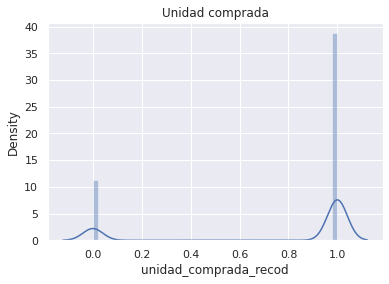

In [ ]:
sns.distplot(df_copy['unidad_comprada_recod'])
plt.title('Unidad comprada')

In [ ]:
rows_delete=df_copy[df_copy["unidad_comprada_recod"] == 0].index
df_copy=df_copy.drop(rows_delete)

Text(0.5, 1.0, 'Unidad comprada')

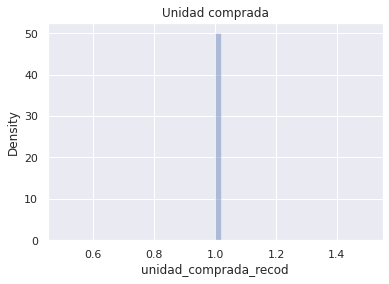

In [ ]:
sns.distplot(df_copy['unidad_comprada_recod'])
plt.title('Unidad comprada')

In [ ]:
r = df_copy.shape[0]
r

87228

In [ ]:
s = p - r
print('Se eliminaron', s, 'registros')

Se eliminaron 25338 registros


Para el caso de las lalitudes, se han eliminado todas aquellas que no contengan el valor sobre su ubicación.

In [ ]:
t = a - r
u = t/a*100
print('Se eliminaron', s, 'registros de la base de datos original, equivalentes a un', round(u,2), '% de los datos' )

Se eliminaron 25338 registros de la base de datos original, equivalentes a un 26.89 % de los datos


## DF Final

Desde este punto, ya se han ejecutado gran parte de los procesos de recodificación y limpieza del dataframe. Para efectos prácticos se procederá a exportar esta nueva versión de dataframe en un documento llamado "df_to_model.csv" que será utilizado para comenzar el entrenamiento de los modelos de Machine Learning.

In [ ]:
df_final = df_copy.copy()

In [ ]:
df_final.shape

(87228, 21)

In [ ]:
df_final.to_csv('df_to_model.csv') 

In [ ]:
#comandos para descargar la base de datos
#from google.colab import files
#df_final.to_csv('df_to_model.csv') 
#files.download('df_to_model.csv')

## Análisis exploratorio de las variables categoricas


Se procede a ejecutar análisis eploratorio de variables categóricas de manera gráfica

In [ ]:
#Se efectúa un analisis visual de las variables categoricas
var_cat = [df['dia_semana_recod'],df['bajo_demanda_recod'],df['id_recolector_recod'],df['id_conductor_recod'],df['id_tienda_recod'],df['antiguedad_recod'],df['tienda_recod'],df['id_producto_recod']]


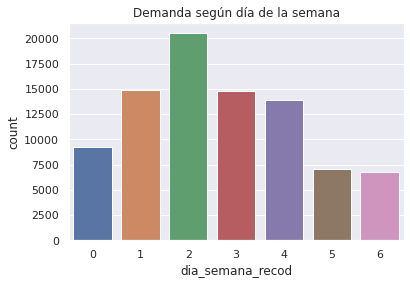

In [ ]:
#Se inspecciona distribución según día de la semana
sns.set_theme(style="darkgrid")
ax1 = sns.countplot(x=df_final['dia_semana_recod'], data=df_final)
plt.title("Demanda según día de la semana");


Se observa que el pick de demanda ocurre el día martes (2), mientras que la menor demanda se concentra en los días viernes (5) y sábados (6)

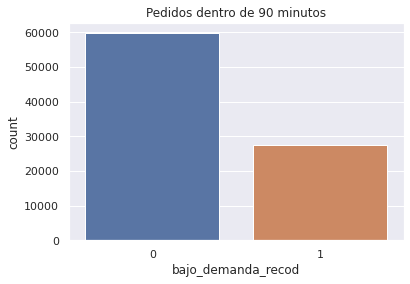

In [ ]:
ax2 = sns.countplot(x=df_final['bajo_demanda_recod'], data=df_final)
plt.title("Pedidos dentro de 90 minutos");


Se puede observar que existen sobre 60 mil registros que no son bajo de manda, mientras existen poco menos de 30 mil que son bajo demanda. Esto quiere decir que cerca del 30% del total de los productos solicitados NO ocurren en modalidad bajo demanda.

Text(0.5, 1.0, 'Demanda según tienda')

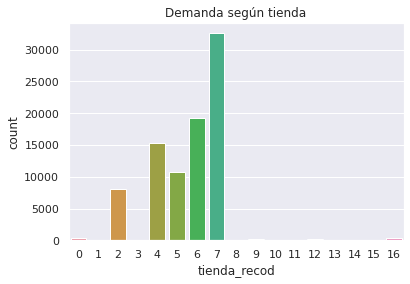

In [ ]:
ax3 = sns.countplot(x=df_final['tienda_recod'],data=df_final)
plt.title("Demanda según tienda")


Se puede observar que la mayoria de las compras se efectúan en la las tiendas categorizadas como 2, 4, 5, 6 y 7. Donde la número 7 se lleva la mayor cantidad de ventas, asociado a un valor superior a 30.000 productos.

In [ ]:
df.columns

Index(['id_orden', 'latitud', 'longitud', 'dia_semana', 'tiempo_prometido',
       'tiempo_actual', 'bajo_demanda', 'id_recolector', 'id_conductor',
       'id_tienda', 'total_minutos', 'antiguedad', 'puntaje_aciertos',
       'velocidad_recoleccion', 'puntaje_aceptacion', 'puntaje_recolector',
       'tienda', 'latitud_tienda', 'longitud_tienda', 'id_producto',
       'cantidad', 'cantidad_encontrada', 'unidad_comprada', 'id_orden_recod',
       'dia_semana_recod', 'bajo_demanda_recod', 'id_recolector_recod',
       'id_conductor_recod', 'id_tienda_recod', 'antiguedad_recod',
       'tienda_recod', 'id_producto_recod', 'unidad_comprada_recod', 'dif',
       'dif_s', 'dif_m'],
      dtype='object')

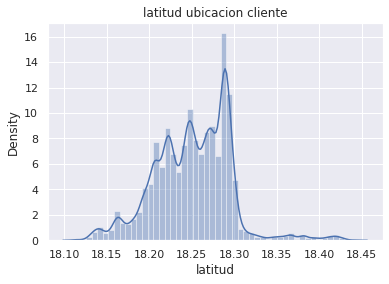

In [ ]:
sns.distplot(df_final['latitud'])
plt.title('latitud ubicacion cliente');

Text(0.5, 1.0, 'longitud ubicacion cliente')

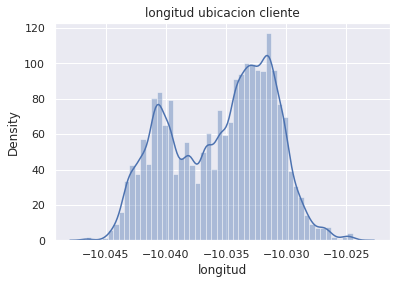

In [ ]:
sns.distplot(df_final['longitud'])
plt.title('longitud ubicacion cliente')

La mayor parte de los clientes se ubican entre las latitudes 18.20 y 18.20 grados y entre las longitudes -10.040 y -10.030

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87228 entries, 2 to 120875
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   latitud                87228 non-null  float64
 1   longitud               87228 non-null  float64
 2   total_minutos          87228 non-null  float64
 3   puntaje_aciertos       87228 non-null  float64
 4   velocidad_recoleccion  87228 non-null  float64
 5   puntaje_aceptacion     87228 non-null  float64
 6   puntaje_recolector     87228 non-null  float64
 7   latitud_tienda         87228 non-null  float64
 8   longitud_tienda        87228 non-null  float64
 9   cantidad               87228 non-null  float64
 10  cantidad_encontrada    87228 non-null  float64
 11  id_orden_recod         87228 non-null  int64  
 12  dia_semana_recod       87228 non-null  int64  
 13  bajo_demanda_recod     87228 non-null  int64  
 14  id_recolector_recod    87228 non-null  int64  
 15  i

Text(0.5, 1.0, 'Latitud ubicacion tienda')

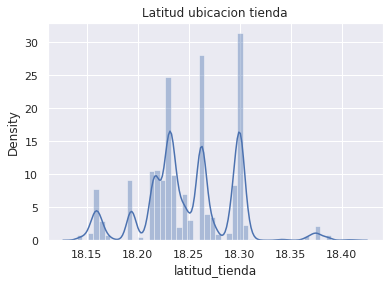

In [ ]:
sns.distplot(df_final['latitud_tienda'])
plt.title('Latitud ubicacion tienda')

Text(0.5, 1.0, 'Longitud ubicacion tienda')

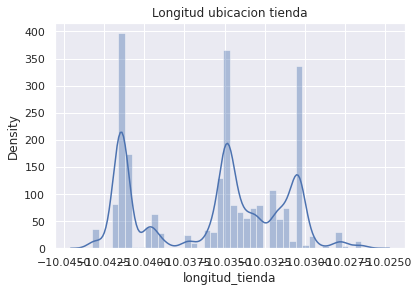

In [ ]:
sns.distplot(df_final['longitud_tienda'])
plt.tight_layout()
plt.title('Longitud ubicacion tienda')

En cuanto a la ubicación de las tiendas, esta es mucho más dispersa

## Correlación
Mapa de correlación para observar como se mueven los datos en el cruce de uno a uno.

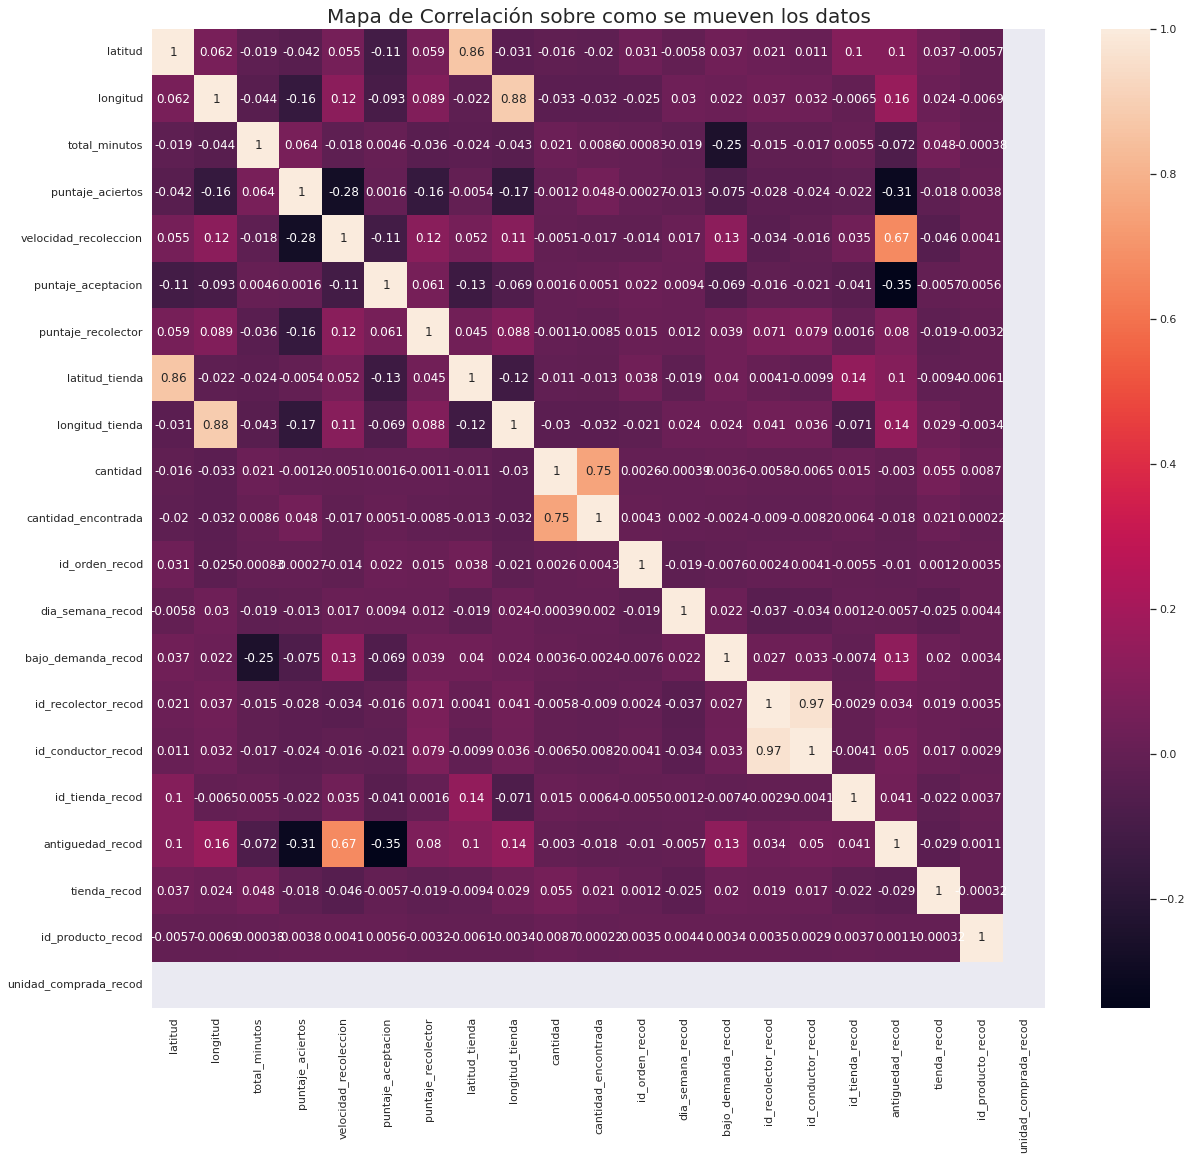

In [ ]:
corr_df = df_final.corr(method='pearson')

plt.figure(figsize=(20, 18))
sns.heatmap(corr_df, annot=True)
plt.title("Mapa de Correlación sobre como se mueven los datos", size=20)
plt.show()

Las principales correlaciones a priori que encontramos son las siguientes:

*   Antigüedad del recolector y la velocidad de recolección
*   Cantidad de productos vs cantidad encontrada
*   El Recolector y el Conductor parecieran ser siempre el mismo ya que están muy correlacionados
*   Las latitudes y longitudes del destinatario están muy correlacionadas con las latitudes y longitudes de las tiendas.

Al analizar las mejores correlaciones existentes no se encontró una correlación directa con nuestro vector objetivo.





# Modelamiento

In [580]:
#Se establece la función plot_importance que permitirá determinar el nivel de importancia de cada atributo en los modelos entrenados
def plot_importance(fit_model, feat_names):
    """TODO: Docstring for plot_importance.

    :fit_model: TODO
    :: TODO
    :returns: TODO

    """
    tmp_importance = fit_model.feature_importances_
    sort_importance = np.argsort(tmp_importance)[::-1]
    names = [feat_names[i] for i in sort_importance]
    plt.title("Feature importance")
    plt.barh(range(len(feat_names)), tmp_importance[sort_importance])
    plt.yticks(range(len(feat_names)), names, rotation=0)


## Importar datos de modelamiento

In [581]:
df_for_model = pd.read_csv(path + '/df_to_model.csv').drop(columns='Unnamed: 0')

In [582]:
df_for_model.head(1)

,latitud,longitud,total_minutos,puntaje_aciertos,velocidad_recoleccion,puntaje_aceptacion,puntaje_recolector,latitud_tienda,longitud_tienda,cantidad,...,id_orden_recod,dia_semana_recod,bajo_demanda_recod,id_recolector_recod,id_conductor_recod,id_tienda_recod,antiguedad_recod,tienda_recod,id_producto_recod,unidad_comprada_recod
0,18.278378,-10.032018,99.339095,0.8318,2.38,0.96,4.84,18.231901,-10.030355,1.0,...,5407,0,0,528,527,6,2,7,595,1


##Escalamiento

In [583]:
df_for_model.info()
df_for_model_copy = df_for_model.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88478 entries, 0 to 88477
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   latitud                88478 non-null  float64
 1   longitud               88478 non-null  float64
 2   total_minutos          88478 non-null  float64
 3   puntaje_aciertos       88478 non-null  float64
 4   velocidad_recoleccion  88478 non-null  float64
 5   puntaje_aceptacion     88478 non-null  float64
 6   puntaje_recolector     88478 non-null  float64
 7   latitud_tienda         88478 non-null  float64
 8   longitud_tienda        88478 non-null  float64
 9   cantidad               88478 non-null  float64
 10  cantidad_encontrada    88478 non-null  float64
 11  id_orden_recod         88478 non-null  int64  
 12  dia_semana_recod       88478 non-null  int64  
 13  bajo_demanda_recod     88478 non-null  int64  
 14  id_recolector_recod    88478 non-null  int64  
 15  id

In [584]:
df_for_model.sample()

,latitud,longitud,total_minutos,puntaje_aciertos,velocidad_recoleccion,puntaje_aceptacion,puntaje_recolector,latitud_tienda,longitud_tienda,cantidad,...,id_orden_recod,dia_semana_recod,bajo_demanda_recod,id_recolector_recod,id_conductor_recod,id_tienda_recod,antiguedad_recod,tienda_recod,id_producto_recod,unidad_comprada_recod
85358,18.202711,-10.033838,53.0,0.8706,1.58,1.0,4.76,18.194434,-10.033712,1.0,...,945,4,0,73,73,82,0,5,17903,1


Tomando en cuenta la distinta naturaleza de los atributos presentes en el Dataframe, se utlizará el escalamiento de los datos mediante MinMaxScaler, librería que permite transformar las funciones escalando cada función a un rango determinado, el cual en este caso será entre 0 y 1. 

Vale la pena mencionar que MinMaxScaler es bastante sensitivo a los outliers.

In [585]:
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df_for_model)
df_for_model = pd.DataFrame(scaled_df, columns=df_for_model.columns)


In [586]:
df_kbest_selection = df_for_model
df_kbest_selection.head()

,latitud,longitud,total_minutos,puntaje_aciertos,velocidad_recoleccion,puntaje_aceptacion,puntaje_recolector,latitud_tienda,longitud_tienda,cantidad,...,id_orden_recod,dia_semana_recod,bajo_demanda_recod,id_recolector_recod,id_conductor_recod,id_tienda_recod,antiguedad_recod,tienda_recod,id_producto_recod,unidad_comprada_recod
0,0.502468,0.646704,0.390037,0.426066,0.467456,0.893333,0.777778,0.337352,0.750542,0.232737,...,0.743026,0.0,0.0,0.884422,0.884228,0.053571,0.666667,0.4375,0.023802,0.0
1,0.502468,0.646704,0.390037,0.426066,0.467456,0.893333,0.777778,0.337352,0.750542,0.488491,...,0.743026,0.0,0.0,0.884422,0.884228,0.053571,0.666667,0.4375,0.617689,0.0
2,0.502468,0.646704,0.390037,0.426066,0.467456,0.893333,0.777778,0.337352,0.750542,0.232737,...,0.743026,0.0,0.0,0.884422,0.884228,0.053571,0.666667,0.4375,0.238619,0.0
3,0.502468,0.646704,0.390037,0.426066,0.467456,0.893333,0.777778,0.337352,0.750542,0.232737,...,0.743026,0.0,0.0,0.884422,0.884228,0.053571,0.666667,0.4375,0.605688,0.0
4,0.275720,0.893274,0.255061,0.462559,0.124260,0.893333,0.777778,0.337352,0.750542,0.232737,...,0.369383,0.0,0.0,0.251256,0.251678,0.053571,0.000000,0.4375,0.188135,0.0


Se procede a escoger los mejores atributos con todo el dataframe para el modelo utilizando la libreria SelectKBest, este método selecciona los atributos de acuerdo a los "K" puntajes más altos

In [587]:
df_kbest_selection = df_kbest_selection.drop(columns='total_minutos')

In [588]:
# Se crea el selector y se fitea a las muestras de entrenamiento y validación
X_new = SelectKBest(f_regression, k=10)
X_new.fit(df_kbest_selection, df_for_model['total_minutos'])
# Se almacenan las columnas en una variable para luego ubicar sus nombres en el dataframe resultante del método
cols = X_new.get_support(indices=True)
X_new = df_kbest_selection.iloc[:,cols]
X_new.head()

,latitud,longitud,puntaje_aciertos,velocidad_recoleccion,puntaje_recolector,latitud_tienda,longitud_tienda,bajo_demanda_recod,antiguedad_recod,tienda_recod
0,0.502468,0.646704,0.426066,0.467456,0.777778,0.337352,0.750542,0.0,0.666667,0.4375
1,0.502468,0.646704,0.426066,0.467456,0.777778,0.337352,0.750542,0.0,0.666667,0.4375
2,0.502468,0.646704,0.426066,0.467456,0.777778,0.337352,0.750542,0.0,0.666667,0.4375
3,0.502468,0.646704,0.426066,0.467456,0.777778,0.337352,0.750542,0.0,0.666667,0.4375
4,0.275720,0.893274,0.462559,0.124260,0.777778,0.337352,0.750542,0.0,0.000000,0.4375


In [589]:
df_for_model = pd.read_csv(path + '/df_to_model.csv').drop(columns='Unnamed: 0')
df_for_model_cp = df_for_model
df_for_final_testing = df_for_model_cp.iloc[85824:88478, :]
df_for_final_testing.shape

(2654, 21)

In [590]:
df_for_model = df_for_model.loc[:,['latitud',	'longitud',	'puntaje_aciertos',	'velocidad_recoleccion',	'puntaje_recolector',	'latitud_tienda',	'longitud_tienda',	'bajo_demanda_recod',	'antiguedad_recod',	'tienda_recod', 'total_minutos']]
  
df_for_model.sample()


,latitud,longitud,puntaje_aciertos,velocidad_recoleccion,puntaje_recolector,latitud_tienda,longitud_tienda,bajo_demanda_recod,antiguedad_recod,tienda_recod,total_minutos
6077,18.242995,-10.031875,0.875,1.78,4.92,18.226984,-10.030564,1,3,4,68.0


In [591]:
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df_for_model)
df_for_model = pd.DataFrame(scaled_df, columns=df_for_model.columns)

In [592]:
df_for_model.head()

,latitud,longitud,puntaje_aciertos,velocidad_recoleccion,puntaje_recolector,latitud_tienda,longitud_tienda,bajo_demanda_recod,antiguedad_recod,tienda_recod,total_minutos
0,0.502468,0.646704,0.426066,0.467456,0.777778,0.337352,0.750542,0.0,0.666667,0.4375,0.390037
1,0.502468,0.646704,0.426066,0.467456,0.777778,0.337352,0.750542,0.0,0.666667,0.4375,0.390037
2,0.502468,0.646704,0.426066,0.467456,0.777778,0.337352,0.750542,0.0,0.666667,0.4375,0.390037
3,0.502468,0.646704,0.426066,0.467456,0.777778,0.337352,0.750542,0.0,0.666667,0.4375,0.390037
4,0.275720,0.893274,0.462559,0.124260,0.777778,0.337352,0.750542,0.0,0.000000,0.4375,0.255061


In [593]:
print("Cantidad de registros a entrenar", df_for_model.shape)

Cantidad de registros a entrenar (88478, 11)


Se dejará para el final este dataframe especialmente para testeo luego de entrenados los modelos

In [594]:
#Se utilizará el método Train_test_split con una muestra de entrenamiento y validación divididas en un 33% 
X_train,X_test, y_train, y_test = train_test_split(
    df_for_model.drop(columns='total_minutos'),
    df_for_model["total_minutos"],
    test_size = 0.33,
    random_state = 123
)

In [595]:
print("Cantidad de registros X_train", X_train.shape[0])
print("Cantidad de registros y_train", y_train.shape[0])
print("Cantidad de registros X_test", X_test.shape[0])
print("Cantidad de registros y_test", y_test.shape[0])

Cantidad de registros X_train 59280
Cantidad de registros y_train 59280
Cantidad de registros X_test 29198
Cantidad de registros y_test 29198


In [596]:
df_for_model.head(2)

,latitud,longitud,puntaje_aciertos,velocidad_recoleccion,puntaje_recolector,latitud_tienda,longitud_tienda,bajo_demanda_recod,antiguedad_recod,tienda_recod,total_minutos
0,0.502468,0.646704,0.426066,0.467456,0.777778,0.337352,0.750542,0.0,0.666667,0.4375,0.390037
1,0.502468,0.646704,0.426066,0.467456,0.777778,0.337352,0.750542,0.0,0.666667,0.4375,0.390037


## Modelo k-nearest neighbors regressor



### Entrenamiento del modelo KNN
Se entrena el modelo con un número de 5 vecinos y con peso en distancia.

In [597]:
KNN_reg = KNeighborsRegressor(n_neighbors=5, weights="distance")
KNN_regressor = KNN_reg.fit(X_train, y_train)
KNN_Y_pred = KNN_regressor.predict(X_test)

In [598]:
X_test.head()

,latitud,longitud,puntaje_aciertos,velocidad_recoleccion,puntaje_recolector,latitud_tienda,longitud_tienda,bajo_demanda_recod,antiguedad_recod,tienda_recod
4559,0.528073,0.531707,0.511374,0.207101,0.944444,0.566209,0.473566,1.0,0.666667,0.3750
53355,0.272142,0.468252,0.518483,0.189349,0.277778,0.073558,0.488436,1.0,0.000000,0.3750
87676,0.327648,0.257140,0.755450,0.186391,0.833333,0.287359,0.097593,0.0,0.000000,0.4375
13472,0.480085,0.454079,0.562559,0.227811,0.500000,0.459178,0.198689,0.0,0.000000,0.3750
23883,0.426317,0.367555,0.395261,0.269231,0.888889,0.444214,0.122155,0.0,0.000000,0.4375


In [599]:
y_test.head()

4559     0.206478
53355    0.210526
87676    0.242915
13472    0.546559
23883    0.546559
Name: total_minutos, dtype: float64

Se observaa que el porcentaje de fiabilidad del modelo esta entre 98.90% el cual es bastante bueno

In [600]:
print("El modelo KNN tiene un porcentaje de fiabilidad un {:.2f}%".format(
      KNN_regressor.score(X_test, y_test) * 100
  ))

El modelo KNN tiene un porcentaje de fiabilidad un 98.95%


In [601]:
mse = metrics.mean_squared_error(y_test, KNN_Y_pred)
mae = metrics.mean_absolute_error(y_test, KNN_Y_pred)
R2 = r2_score(y_test, KNN_Y_pred)

print("MSE: ",mse)
print("MAE: ",mae)
print("R^2: ",R2)

MSE:  0.0003045455999260532
MAE:  0.0013708958123655496
R^2:  0.9894581901567243


Luego se observan las métricas y se concluye que son considerablemente buenas ya que la predicción del modelo pareciera ser bastante certera.

Se visualiza que el resultado de MAE y MSE son bastantes bajos, lo cual quiere decir que los errores de predictibilidad versus la realidad son  bajos, y con respecto a R2 el resultado es bastante bueno el cual para ser bueno debería sobrepasar el 70% y este lo cumple.

#### Desescalamiento para modelo 

El siguiente procedimiento tiene por objetivo deshacer el escalamiento previamente ejecutado sobre los datos, con la finalidad de observar los resultados predichos caso por caso

In [ ]:
#Se respalda copia del dataframe
df_real = X_test.copy()
df_real['total_minutos'] = y_test

df_real.sample()

,latitud,longitud,puntaje_aciertos,velocidad_recoleccion,puntaje_recolector,latitud_tienda,longitud_tienda,bajo_demanda_recod,antiguedad_recod,tienda_recod,total_minutos
30045,18.226431,-10.041012,0.8594,2.11,4.76,18.218347,-10.041579,0,2,7,100.0


In [ ]:
#Se respalda copia del dataframe
df_real = X_test.copy()
df_real['total_minutos'] = y_test

df_real.sample()
#Se aplica el escalador a la inversa para obtener valores que podamos comprender
df_real_test = scaler.inverse_transform(df_real[df_for_model.columns])

In [ ]:
real = pd.DataFrame(df_real_test, columns=df_for_model.columns)
real.sample()

,latitud,longitud,puntaje_aciertos,velocidad_recoleccion,puntaje_recolector,latitud_tienda,longitud_tienda,bajo_demanda_recod,antiguedad_recod,tienda_recod,total_minutos
25689,24.119236,-10.274054,0.931652,4.8222,7.592,23.064608,-10.215692,0.0,0.0,96.0,16305.0


In [ ]:
df_hat = X_test.copy()
df_hat['total_minutos'] = KNN_Y_pred

df_hat.sample()

,latitud,longitud,puntaje_aciertos,velocidad_recoleccion,puntaje_recolector,latitud_tienda,longitud_tienda,bajo_demanda_recod,antiguedad_recod,tienda_recod,total_minutos
52600,18.283486,-10.036719,0.8538,2.3,5.0,18.299885,-10.034849,0,2,7,111.0


In [ ]:
df_hat_test = scaler.inverse_transform(df_hat[df_for_model.columns])

In [ ]:
hat = pd.DataFrame(df_hat_test, columns=df_for_model.columns)
hat.sample()

,latitud,longitud,puntaje_aciertos,velocidad_recoleccion,puntaje_recolector,latitud_tienda,longitud_tienda,bajo_demanda_recod,antiguedad_recod,tienda_recod,total_minutos
18930,24.164319,-10.274026,0.920659,7.3234,7.7072,23.10198,-10.215752,0.0,6.0,112.0,41005.0


In [ ]:
hat.columns

Index(['latitud', 'longitud', 'puntaje_aciertos', 'velocidad_recoleccion',
       'puntaje_recolector', 'latitud_tienda', 'longitud_tienda',
       'bajo_demanda_recod', 'antiguedad_recod', 'tienda_recod',
       'total_minutos'],
      dtype='object')

In [ ]:
comparativa = real.merge(hat, how='inner', on=['latitud', 'longitud', 'puntaje_aciertos', 'velocidad_recoleccion',
       'puntaje_recolector', 'latitud_tienda', 'longitud_tienda',
       'bajo_demanda_recod', 'antiguedad_recod', 'tienda_recod'])


In [ ]:
comparativa_y = comparativa.loc[:,['total_minutos_x', 'total_minutos_y']]

In [ ]:
comparativa_y['dif'] = comparativa_y['total_minutos_x'] - comparativa['total_minutos_y']

In [ ]:
comparativa_y 

,total_minutos_x,total_minutos_y,dif
0,23468.000000,23468.000000,0.0
1,23468.000000,23468.000000,0.0
2,23468.000000,23468.000000,0.0
3,23468.000000,23468.000000,0.0
4,23468.000000,23468.000000,0.0
...,...,...,...
216447,24539.756395,24539.756395,0.0
216448,25444.000000,25444.000000,0.0
216449,11365.000000,11365.000000,0.0
216450,18034.000000,18034.000000,0.0


Text(0.5, 1.0, 'dif')

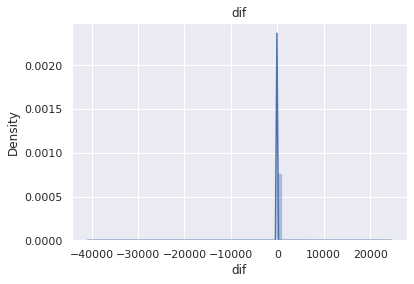

In [ ]:
sns.distplot(comparativa_y['dif'])
plt.title('dif')

In [ ]:
comparativa_y.describe()

,total_minutos_x,total_minutos_y,dif
count,216452.000000,216452.000000,216452.000000
mean,26609.750175,26617.339380,-7.589205
std,11586.673334,11576.783684,641.926968
min,744.000000,744.000000,-40755.000000
25%,20504.000000,20504.000000,0.000000
50%,25197.000000,25197.000000,0.000000
75%,33595.000000,33595.000000,0.000000
max,61753.000000,61753.000000,24453.000000


In [ ]:
comparativa_y.head()

,total_minutos_x,total_minutos_y,dif
0,23468.0,23468.0,0.0
1,23468.0,23468.0,0.0
2,23468.0,23468.0,0.0
3,23468.0,23468.0,0.0
4,23468.0,23468.0,0.0


In [ ]:
#Se aplica la eliminación del outlier
rows_delete = comparativa_y[(comparativa_y["dif"] > 6.8)].index
comparativa_y = comparativa_y.drop(rows_delete)

In [ ]:
#Se aplica la eliminación del outlier
rows_delete = comparativa_y[(comparativa_y["dif"] < -6.8)].index
comparativa_y = comparativa_y.drop(rows_delete)

In [ ]:
comparativa_y.describe()

,total_minutos_x,total_minutos_y,dif
count,215845.000000,215845.000000,215845.0
mean,26634.931832,26634.931832,0.0
std,11581.729903,11581.729903,0.0
min,744.000000,744.000000,0.0
25%,20751.000000,20751.000000,0.0
50%,25197.000000,25197.000000,0.0
75%,33595.000000,33595.000000,0.0
max,61753.000000,61753.000000,0.0


Text(0.5, 1.0, 'dif')

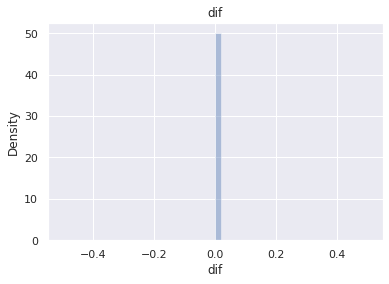

In [ ]:
sns.distplot(comparativa_y['dif'])
plt.title('dif')

Se observa que las diferencias en tiempo entre lo predicho y lo observado es cercana a 0 cuando se revisa caso por caso



Se utilizará un nuevo entrenamiento del dataframe con todas las columnas para entrenar los siguientes modelos

In [602]:
#Se utilizará el método Train_test_split con una muestra de entrenamiento y validación divididas en un 33% 
X_train,X_test, y_train, y_test = train_test_split(
    df_for_model_cp.drop(columns='total_minutos'),
    df_for_model_cp["total_minutos"],
    test_size = 0.33,
    random_state = 123
)

### Árbol de Regresión

Entrenamos el modelo sin hiperparametros con los datos anteriormente vistos.

In [605]:
modelo_arbol_reg1 = DecisionTreeRegressor()

modelo_arbol_reg1= modelo_arbol_reg1.fit(X_train, y_train)

Y_hat = modelo_arbol_reg1.predict(X_test)

El arbol de regresion obtuvo un buen procentaje de fiabilidad el cual nos indica que el modelo es bastante bueno, pero quizas donde el porcentaje es demasiado alto se presume que puede ser por overfitting.

In [606]:
print("El modelo Árbol de regresión tiene como porcentaje de fiabilidad un {:.2f}%".format(
      modelo_arbol_reg1.score(X_test, y_test) * 100
  ))

El modelo Árbol de regresión tiene como porcentaje de fiabilidad un 98.42%


Luego vemos que las métricas son bastante buenas ya que la predicción del modelo es la esperada, esto nos indica que el resultado de MAE y MSE son bastantes bajos, osea los errores son pequeños, y con respecto a R2 el resultado es bueno, considerando que un resultado bueno debería sobrepasar el 70% y este lo cumple, aunque se piensa que puede ser overfitting.


latitud	longitud	puntaje_aciertos	puntaje_recolector	latitud_tienda	longitud_tienda	cantidad	bajo_demanda_recod	antiguedad_recod	tienda_recod

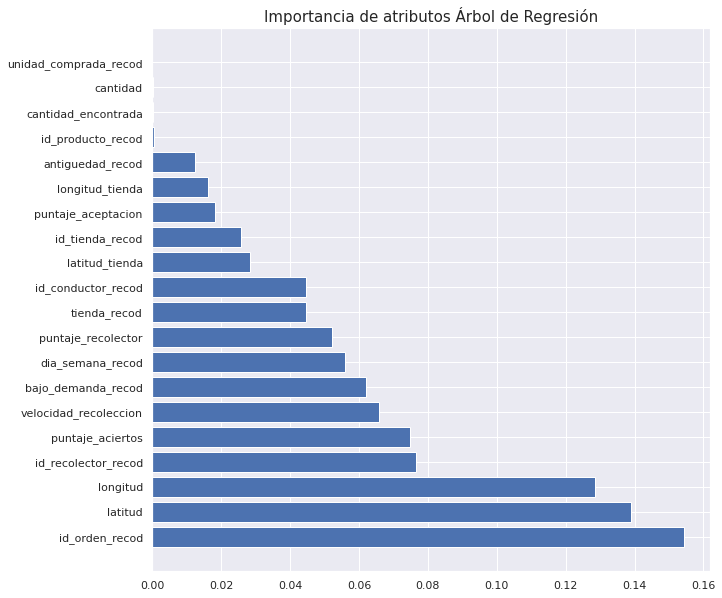

In [607]:
plt.figure(figsize=(10,10))
plot_importance(modelo_arbol_reg1, X_train.columns)
plt.title("Importancia de atributos Árbol de Regresión", size=15);

Para el modelo de árbol de regresión, obtenemos que los atributos asociados a id_orden, latitud y longitud del domicilio de comprador, el puntaje de aciertos del recolector, la velocidad y el id_de recolector son los factores que más influyen en el modelo.

In [608]:
mse = mean_squared_error(y_test, Y_hat)
mae = mean_absolute_error(y_test, Y_hat)
R2 = r2_score(y_test, Y_hat)

print("MSE: ",mse)
print("MAE: ",mae)
print("R2: ",R2)


MSE:  27.845032523776403
MAE:  0.47446155212485486
R2:  0.9842014702698854


In [609]:
pickle.dump(modelo_arbol_reg1, open('modelo_arbol_reg1.pkl', 'wb'))

## RandomForest

In [610]:
RF_model=RandomForestRegressor().fit(X_train, y_train)

In [611]:
y_hat_rf=RF_model.predict(X_test)

In [612]:
mse = mean_squared_error(y_test, y_hat_rf)
mae = mean_absolute_error(y_test, y_hat_rf)
R2 = r2_score(y_test, y_hat_rf)

print("MSE: ",mse)
print("MAE: ",mae)
print("R2: ",R2)


MSE:  15.780857962647916
MAE:  0.7499033977248738
R2:  0.9910463615556303


In [ ]:
print("El modelo tiene como porcentaje de fiabilidad un {:.2f}%".format(
      RF_model.score(X_test, y_test) * 100
  )) #esto tengo mis dudas sobre si realmente estamso entregando el porcentaje de confiabilidad

El modelo tiene como porcentaje de fiabilidad un 99.04%


In [ ]:
# dando hiperparametros y busqueda de grilla para RandomForest
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num =40)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
random_forest_param = { 'n_estimators' : [50, 100, 500, 1000, 2000], 'max_features' : ['log2' , 'sqrt'] }
print(random_grid)



{'n_estimators': [200, 220, 241, 261, 282, 302, 323, 343, 364, 384, 405, 425, 446, 466, 487, 507, 528, 548, 569, 589, 610, 630, 651, 671, 692, 712, 733, 753, 774, 794, 815, 835, 856, 876, 897, 917, 938, 958, 979, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
rf_random = RandomizedSearchCV(estimator = RF_model, param_distributions = random_grid, 
                               n_iter = 2, cv = 2, verbose=2, random_state=42, n_jobs = -1)

In [ ]:
# Fit the random search model
rf_random= rf_random.fit(X_train, y_train)

Fitting 2 folds for each of 2 candidates, totalling 4 fits


In [ ]:
y_hat_rf_s= rf_random.predict(X_test)


In [ ]:
mse = mean_squared_error(y_test, y_hat_rf_s)
mae = mean_absolute_error(y_test, y_hat_rf_s)
R2 = r2_score(y_test, y_hat_rf_s)

print("MSE: ",mse)
print("MAE: ",mae)
print("R2: ",R2)


MSE:  31.822393487700875
MAE:  2.0998434532579635
R2:  0.9819448216061676


In [ ]:
print("El modelo Random Forest tiene como porcentaje de fiabilidad un {:.2f}%".format(
      rf_random.score(X_test, y_test) * 100
  ))

El modelo Random Forest tiene como porcentaje de fiabilidad un 98.19%


Text(0.5, 1.0, 'Importancia de atributos Randon Forest')

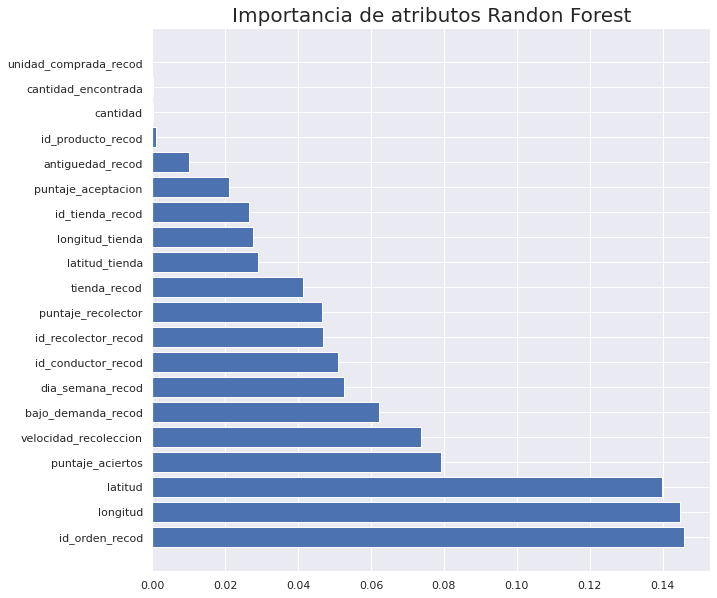

In [ ]:
plt.figure(figsize=(10,10))
plot_importance(RF_model, X_train.columns)
plt.title("Importancia de atributos Randon Forest", size=20)

## GradientBoosting

In [ ]:
gradient_boost_model = GradientBoostingRegressor().fit(X_train, y_train)

In [ ]:
#guardamos los valores predichos:
y_hat_gb = gradient_boost_model.predict(X_test)


In [ ]:
print("El modelo tiene como porcentaje de fiabilidad un {:.2f}%".format(
      gradient_boost_model.score(X_test, y_test) * 100
  ))

El modelo tiene como porcentaje de fiabilidad un 23.29%


In [ ]:
#Búsqueda de grilla
#Implementamos busqueda de grilla en Gradient Boosting
param_grid = {'learning_rate': [0.01, 0.1, 0.5],
              'n_estimators': [3, 100, 100], 
              'subsample': [0.1,0.5,0.9]}
              

gb_grid = GridSearchCV(GradientBoostingRegressor(),
                      param_grid=param_grid,
                      cv=2, n_jobs=1).fit(X_train, y_train)


In [ ]:
y_hat_gb_g = gb_grid.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_hat_gb_g)
mae = mean_absolute_error(y_test, y_hat_gb_g)
R2 = r2_score(y_test, y_hat_gb_g)

print("MSE: ",mse)
print("MAE: ",mae)
print("R2: ",R2)

MSE:  888.5051322873265
MAE:  22.403561095010488
R2:  0.49588585555377895


In [ ]:
print("El modelo tiene como porcentaje de fiabilidad un {:.2f}%".format(
      gb_grid.score(X_test, y_test) * 100
  ))

El modelo tiene como porcentaje de fiabilidad un 49.59%


Dados los magros resultados se descarta este modelo siendo innecesario que sea entrenado en nuevos datos

## Adaboost

In [613]:
mod_adaboost = AdaBoostRegressor().fit(X_train, y_train)

In [614]:
y_hat_ab = mod_adaboost.predict(X_test)

In [615]:
mse = mean_squared_error(y_test, y_hat_ab)
mae = mean_absolute_error(y_test, y_hat_ab)
R2 = r2_score(y_test, y_hat_ab)

print("MSE: ",mse)
print("MAE: ",mae)
print("R2: ",R2)

MSE:  1612.2190331414245
MAE:  29.76365025108567
R2:  0.0852698661855601


In [616]:
print("El modelo tiene como porcentaje de fiabilidad un {:.2f}%".format(
      mod_adaboost.score(X_test, y_test) * 100
  ))

El modelo tiene como porcentaje de fiabilidad un 8.53%


In [617]:
#Búsqueda de grilla
param_grid_ab = {'learning_rate': [0.01, 0.1, 0.5,0.9], 
                 'n_estimators': [5, 50, 200]}

ab_grid = GridSearchCV(AdaBoostRegressor(), param_grid = param_grid_ab, 
                       cv=2, n_jobs=1).fit(X_train, y_train)
y_hat_ab_g = ab_grid.best_estimator_.predict(X_test)


In [618]:
mse = mean_squared_error(y_test, y_hat_ab_g)
mae = mean_absolute_error(y_test, y_hat_ab_g)
R2 = r2_score(y_test, y_hat_ab_g)

print("MSE: ",mse)
print("MAE: ",mae)
print("R2: ",R2)

MSE:  1606.0637957068732
MAE:  29.590979462905054
R2:  0.0887621839453846


A continuación se observa un resumen del desempeño de los modelos que se han aplicado para verificar cual de todos predice de mejor forma.

El modelo escogido fue K-nearest Neighbors, a pesar de que Árbol de regresión y Random Forest otorgan métricas más altas, sospechamos que existe overfitting (comportamiento común de los modelos que utilizan algoritmos de hojas). Es entonces con este modelo que efectuaremos las predicciones que serán cargadas en la API que se edispondrá para que Supermercados ADL planifique sus entregas.